<h1 style="color:black; font-family:'Times New Roman'; font-weight:bold;">
ONLINE RETAIL II (UCL REPOSITORY)
</h1>



<h2 style="color:gray; font-family:'Times New Roman'; font-weight:bold;">
INTRODUCTION
</h2>


This project presents a comprehensive exploratory data analysis (EDA) of an online retail dataset to understand customer purchasing behavior, product performance, and sales trends across various time dimensions.The dataset used in this project is sourced from the widely referenced Online Retail Excel file, originally obtained from the UCI Machine Learning Repository, a public archive for machine-learning datasets. The file contains real transactional records from a UK-based online retail store for the year 2010–2011, capturing details such as invoice numbers, stock codes, product descriptions, quantities purchased, invoice dates, unit prices, customer IDs, and countries. This rich, real-world dataset provides an ideal foundation for studying customer purchasing patterns, product-level performance, and time-based sales trends. By analyzing this transactional data, we can extract meaningful insights that reflect actual business operations and support various data-driven decisions.

After performing systematic data cleaning and feature engineering, key metrics such as revenue, customer frequency, monetary value, and invoice totals were derived. These metrics were analyzed through univariate, bivariate, and multivariate techniques to uncover patterns and insights essential for business decision-making.

Using statistical summaries and twelve well-designed visualizations created through Matplotlib and Seaborn, the analysis highlights clear trends such as weekday sales dominance, peak purchasing hours, strong year-end seasonality, and the disproportionate revenue contributions of a small group of high-demand products. Customer-level segmentation further reveals distinct spending behaviors, helping identify high-value and loyal customer groups.

Overall, this project transforms raw transactional data into meaningful insights that can guide strategic actions in customer engagement, inventory planning, marketing optimization, and demand forecasting. The findings demonstrate how data analytics can offer valuable support for business growth and operational efficiency.


<h2 style="color:gray; font-family:'Times New Roman'; font-weight:bold;">
ATRIBUTE INFORMATION
</h2>


<h3 style="color:gray; font-family:'Times New Roman'; font-weight:bold;">
DATASET SIZE
</h3>

<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
2010-2011 File
</h4> 
 • ROWS: 525000 Transactions
 • COLUMNS: 8

<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
2009-2010 File
</h4>  
 • ROWS: 525000 Transactions
 • COLUMNS: 8
(combined dataset = 1 million rows with 8 columns)

<h3 style="color:gray; font-family:'Times New Roman'; font-weight:bold;">
COLUMN DETAILS AND DISCRIPTIONS
</h3>

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • InvoiceNo:
</h5> 

 • TYPE: Categorical/string
 
 • DESCRIPTION: Unique invoice number for each transactions. Cancelled invpoces are marked with "C" on the begining.

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Stock code
</h5> 

 • TYPE: Categorical.
 
 • DESCRIPTION: Product code is assigned to each item that the company seels. 

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

 • TYPE: TEXT
 
 • DESCRIPTION: Shows the product name or the product detil. 

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Quantity
</h5> 

 • TYPE:INT
 • DESCRIPTION: Number of units purchased in a transaction . It include both purchases(positive values) and returns (negative values)

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Invoive date
</h5> 

 • TYPE:Date Time
 
 • DESCRIPTION:Shows the timestamp of the transactions (will be used for the time series analysis)

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Unit Price
</h5> 

 • TYPE:FLOAT

 • DESCRIPTION: Prices of the product per unit.

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Customer ID 
</h5> 

 • TYPE:INT
 
 • DESCRIPTION:Unique identifier for each customer.

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Country.
</h5> 

 • TYPE: Categorical.
 
 • DESCRIPTION: The country that the customers had initiated the order and the coulmn inclueds data of 35 countries but majority are from UNITED     KINGDOM




<h3 style="color:gray; font-family:'Times New Roman'; font-weight:bold;">
IMPORTING LIBRARIES 
</h3>


In [1]:
#importing libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly as px

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 


  • We had imported the numpy and pandas for the data manipulation and data cleaning.That includes the reading of CSV files, handing of the missing data, removing of duplicates changing data types, replacing values etc.


  • We had also imported the date time module of the python for the tim series analysis
  
  •Then imported the mtplotlib, seaborn and plotly for the visualization 

In [2]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


<h3 style="color:gray; font-family:'Times New Roman'; font-weight:bold;">
IMPORTING DATASET 
</h3>


In [3]:
#importing the dataset
file_path = r"C:\Users\Sariya\OneDrive\Desktop\DATA ANALYSIS\PYTHON\PYTHON FINAL PROJECT\online retail data.xlsx"

df1 = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')
df2 = pd.read_excel(file_path, sheet_name=1, engine='openpyxl')

In [4]:
#information on download
print (" Dataset Load Successfully!/n")

#show total rows and columns
print("df1 shape:",df1.shape)
print("df2 shape:",df2.shape)

#display first 5 rows of  df1 
df1.head()


 Dataset Load Successfully!/n
df1 shape: (525461, 8)
df2 shape: (541910, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
#display first 5 rows of  df2
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 


  • First we had imported the excel file and imported the both sheets in the file as df1 and df2 using file path 


  • Then we gave the command of [print #(" Dataset Load Successfully!/n") to confirm that the dataset is imported
  
  • Then then displyed the shape (row x column) of the dataset and also display the first five rows using the df.head() function 



<h2 style="color:gray; font-family:'Times New Roman'; font-weight:bold;">
EXPLORATORY DATA ANALYSIS (PREVIEW)
</h2>


  • Here we are going to a deep understanding of the uncleaned dataset that we had imported for the analysis .By doing the exploratory data analysis on the raw data it will show the major errors and problems in the dataset.So through this section we can geta better understandingof our dataset's datashape, missing values,duplicate values, negative quantities, cancelled invoices, summary statistics, basic value insights. 



<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
 • Combining the both sheets as df
</h4> 

In [6]:
#combining both excel sheets using pd.concat
df= pd.concat([df1 , df2], ignore_index=True)

#show total rows and columns
print("df shape:",df.shape)

df shape: (1067371, 8)


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 


  • So now wehave combined the both sheets into one using the pd.concat function 

 

<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
1. Basic dataset overview using (df.shape).
</h4> 


  • Then commanded to show the shape of the combined dataset

  • After that we took the first 5 rows and last 5 rows of the combined data set

In [7]:
#display first 5 rows of the sheet
df.head()



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
#displaying the last 5 rows
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
2. Checking column info and data types.
</h4> 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 


  • Using the (.info()) function we can understand the column missing values , data types and total number of records 

  • The dataset contains 1067371 rows(morethan 1 million) and 8 columns.
  
  • There are four different data types in the dataset,which are;
  
       -Object→ Invoice, Stockcode, Description, Country
       
       -int64 → Quantity
       
       -float64 →  Price , Customer ID
       
       -datetime64 → invoice date
       
       (From this we can umderstand that the text based fields are stored as object type. Numeric colums use integers or float . Invoice date is already correctly recognized as the datetime column).

       
  • In case of the  Missing values
  
       -All columns except description and customerID have complete data(no missing values).
       
       -Description has : 1067371 - 1062989 = 4382 missing values.
       
       -Customer ID has : 1067371 - 824364 = 242997 missing values.
       
       (Inshort we can say that Cuatomer ID hjas the highest number of missing value about 22% of all rows and this indicates that many transactions were made by anonymous or unregistered customers).



  <h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
3. Summary statistics
</h4> 

In [10]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description(Summery statistics)
</h5> 

• The summery statistics using the function (df.discribe())majorly gave out the deatlls of negative quantities , unusual unit prices and outliers.


<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 1. Quantity column 
</h5>   

  • Minimum quantity is -80995 , which is highly unusual and that indicates large negative values caused by returns or incorrect entries.
  
  • Maximum quantity is 80995, shows some extrme bulk orders


  • The mean quantity is around 9.9 which shows that most of the customers buy small quantities .but the outliers pulls the average upward.
  
  • The standard deviation is very high  that is 172 . which confirms significant variable due to extreme values. 


<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 2. InvoiceDate column 
</h5>   

  • Shows 1067371 valid timestamp entries.
  
  • Maximum date is : 2011-12-09

  • Minimum date is : 2009-12-01

  ( Which shows that the date covers a total of two year period and can be used for time series analysis and seasonal trend analysis)



<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 3. Price column 
</h5>   

  • Minimum price is : -11062 (which is error or impossible)
  
  • Maximum price is : 30970 (which means their are luxury goods too)

  • Mean price is    : 4.64 (which shows most of the products are low cost products)



<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 4. Customer ID
</h5>   

  • Count = 824364 ( which means their are missing values)
  
  • a significant portion of the customer id are missing , so we can came tothe conclution that they maybe purchased through unregisterd portal (guest) or anonymous customers 





<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
4. missing values
</h4> 

In [11]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description(missing values)
</h5> 



<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 1. Discriptive column 
</h5>   

  • description column has 4382 missin values 
  
  • These represent cases where the product name was not recorded.


<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 2. Customer ID column
</h5>   

  • It has 243007 missing values, which is about 22-23% of the entire dataset.
  
  • It shows the presence of guest logins or unregistered entries.
  (so for the customers-based analysis we will bw removing the missing values in the column for better insights)




<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
5. Duplicate values
</h4> 

In [12]:
df.duplicated().sum()

np.int64(34335)

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description(missing values)
</h5>

  • By using the function df.duplicated().sum(), we get 34335 duplicate rows 
  
  •For the accurate and reliable analysis we will be removing them 



<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
6. Unique values
</h4> 

In [13]:
df.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description(Unique values)
</h5> 


<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 1. Unique Invoices - 53628
</h5>   

  •this indicates that the dataset contains over 53000 seperate transactions .sinse each invoice could contain multiple items,reflects the high volume of sales activity


<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 2. Uniques stock codes - 5305 
</h5>   

  • It shows the product variety of 5305 unique products


<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 3. Unique product descriptions - 5698
</h5>   

  • This indicates that some products have multiple description variations


<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 4. Unique Invoice Dates - 47635
</h5>   

  • It shows a large variety of date stamps which enables the data more  suitable for time series analysis.


<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 3. Unique Customers - 5942
</h5>   

  • This indicates that there are neraly 6000 customers.


<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 4. Unique Countries
</h5>   

  • The data of customers belongs to 43  different countries



  <h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
7. Cancelled orders
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • It was given with the dataset source that cancelled orders invoices are started with "C".
</h5> 

In [14]:
df['Invoice'].astype(str).str.startswith('C').sum()

np.int64(19494)

In [15]:
df['Invoice'].astype(str).str.startswith('C').sum()

#first 10 rows of cancelled invoice
df['Invoice'].head(10)

0    489434
1    489434
2    489434
3    489434
4    489434
5    489434
6    489434
7    489434
8    489435
9    489435
Name: Invoice, dtype: object

<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
description 
</h5>   

  • By using this code df['Invoice'].astype(str).str.startswith('C').sum() we will be able to calsulate the number of cancelled order 
  In that we use .astype(str) to convert the all values to string so that we can conduct the calculation other wise we cnnot checknit when the invoices are completely numeric



<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
8. negative values
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Having negative values on the quantity and price diectly shows the error that contained in the dataset .
</h5> 

In [16]:
#no of negative values in quantity
(df['Quantity']<0).sum()

np.int64(22950)

In [17]:
#no of negative values in price
(df['Price']<0).sum()

np.int64(5)

<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
description 
</h5>   
<h5 style="color:black; font-family:'arial';">
  • To identify negative values in the dataset, we examined both the Quantity and Price columns. Negative quantities usually indicate product returns, while negative prices suggest refund entries or data entry errors. Using conditional filtering, we found the total number of negative values in each column. These negative values must be handled carefully during data cleaning because they can affect sales totals, revenue analysis, and product performance metrics.
</h5>


<h2 style="color:gray; font-family:'Times New Roman'; font-weight:bold;">
DATA PREPROCESSING
</h2>


<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
 • DATA CLEANING OVERVIEW (Based on the EDA on raw dataset)
</h4> 

Based on the exploratory data analysis we can see several data quality issues in the Online retail dataset. To ensure accurate and reliable analysis we will be doing the following cleaning steps:

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 1.missing values
</h5>   
   - Customer ID column has 243,007 missing entries (around 22% of the dataset).  
   - Description column has 4,382 missing values.  
   These missing values must be addressed to avoid biased customer and product-level analysis.
   

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 2.Duplicates 
</h5>   
   - The dataset contains 34,335 duplicate rows.  
   These duplicates can distort sales totals and customer activity, so we will be removing those duplicates

   

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
3. Cancelled orders
</h5>   
   - EDA shows invoice numbers starting with ‘C’, indicating cancelled transactions.  
   These should be filtered out because they do not represent actual sales.

   

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
4. Negative values in quantities
</h5>  
   - Negative values in Quantity correspond to product returns.  
   These may be removed for basic sales analysis or handled separately for return analysis.
  

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
5. Negative prices
</h5>   
   - Some entries have negative or zero unit prices, which are invalid.  
   These must be removed to prevent incorrect revenue calculations.

   

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
6. Presence of outliers
</h5>   
   - Very large positive and negative values were observed.  
   These outliers can influence statistical results and may require further handling.

   

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
7. Dealing on data types
</h5> 
   - InvoiceDate is already in datetime format, but other fields may require type 
   conversion for efficient analysis.  


Overall theough this data cleaning will ensure that our dataset is free from inconsistencies, errors, and incomplete information. so our data is accurate insights during further analysis and visualization.


<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
1. Handling Missing Values
</h4> 

<h5 style="color:teal; font-family:'adiro'; ">
  • As we had discussed before the missing value is majorly seen in the customer id column and discription. So we will do it in a four step process as

• First we will drop the rows where the both costomer id and description shows as missing , because if the customer id is missing then that means we don't know who purchased and in case of description we don't know what is purchased.  
  
  • Second we will fill the rest of the description rows with the data of stockcode because it share same details 
  
  • Third, we will again drop the remaining description rows after filling with the stockcode
  
  •lastly we will drop the remaining customer id missing rows because if we try to  fill those colums with the term "guest/unidentified/unsuscribed" customers on the further analysis of the data the guest will bw treated as a single customer which will entirely alter our results.    
</h5> 

In [18]:
# 1st drop rows where both columns have missing value
df = df.dropna(subset=['Description','Customer ID'], how='all')

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'arial';">
 By using the code subset=['Description','Customer ID'] it will only select those colum While droping the values
    
 The code how ='all' ensures that the rows where both colums have missing values at the same hve been dropped.
</h5> 
    

In [19]:
# 2nd filling the description colum with stockcode
df['Description'] = df.groupby('StockCode')['Description'].ffill().bfill()

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'arial';">
The code groupby('StockCode') will groups the row by product code

.ffill() this will fills the missing discription withe previous value in same group and 

.bfill() will fill it withnext value if the previous is misssing 
</h5> 

In [20]:
# 3rd drop the existing missing rows in description
df=df.dropna(subset=['Description'])

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
    
If the fillbills have no value to fill then those rows cant be used in product level analysis 
</h5> 

In [21]:
# 4th droping missing customer missing values
df=df.dropna(subset=['Customer ID'])

<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
2.Removing Duplicate Records
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; ">
    Duplicates should be removed because it artificially increases the sales counts and will desort the customer behaviour over purchases
    </h5> 

In [22]:
#counting the duplicates 
df.duplicated().sum()

np.int64(26479)

In [23]:
#removing the duplicates
df = df.drop_duplicates()

In [24]:
#again counting the duplicates 
df.duplicated().sum()

np.int64(0)

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
so here we found 34335 duplicates which inflated our dataset and we  removed all of them
</h5> 


<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
3.  Removing cancelled orders
</h4> 
 
<h5 style="color:teal; font-family:'Times New Roman'; ">
    Cancelled transactions have invoice number with C at the begining ( it was mentioned in the description when the dataset was downloaded) so we remove all of them because it dosen't represent actual sale 
    </h5> 

In [25]:
#filtering cancelled data
df['cancelled']= df['Invoice'].astype(str).str.startswith ('C')

#now removing the filtered section
df = df.drop(columns=['cancelled'])


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • So here we firts created a seperated culumn which contains only cancelled oredrs by filtering ,and there we use .astype(str). for coverting the invoices into strings. And .startswith ('C') returns for true for cancelled orders . we created a cancelled order column as if the value is true then cancelled order and if it is false then valid order 
</h5> 
<h5 style="color:black; font-family:'adiro';">
 • Then we dropped that  cancelled order  by droping the filtered column
</h5>     



<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
4. Handling Negative Value
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; ">
  Negative quantities represents the reurns or the errors in the dataframe. so we will remove them for the basic sales analysis  
</h5>

In [26]:
#filtering the negative values and removing them
df=df.loc[(df['Quantity']> 0) & (df['Price']> 0)]

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • So here by using the code [(df['Quantity']> 0) & (df['Price']> 0)] will help us to create a filtered column with only  negative values.
</h5> 
<h5 style="color:black; font-family:'adiro';">
 • The df=df.loc selects only those rows where the condition is met and it ensures that only positive values remains.
</h5>  


<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
5.  Converting  Datatype
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; ">
 To perform the time series analysis we need to ensure thst the date column is in the right data type. 
</h5>

<h5 style="color:teal; font-family:'Times New Roman'; ">
 We also need to change the data type of customer id which is in float 
</h5>

In [27]:
#converting to datetime 
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#converting customer id
df['Customer ID'] = df['Customer ID'].astype(int).astype(str)

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • So here we chnage the datatype of invoivedate into pandas datetime64 format 
</h5> 
<h5 style="color:black; font-family:'adiro';">
 • Now it enables to extrate month and year from it to do time series and seasonal trend analysis.
</h5>  

<h5 style="color:black; font-family:'adiro';">
 • Then we changed the data type of customer id 
</h5> 
<h5 style="color:black; font-family:'adiro';">
 • The code astype(int) helps to remove the decimals in the column and astype.(str) wil change it to a proper string
</h5> 


<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
6. Text Standardisation & Cleaning
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; ">Text cleaning was performed on the Description, StockCode, Country, and Invoice columns to ensure consistency and improve the quality of product-level and country-level analysis. Spaces were removed, text was standardised to title case or uppercase as appropriate, and unnecessary characters were eliminated. Standardising text ensures that similar items are grouped correctly and avoids duplicate categories caused by inconsistent formatting. 
    </h5>

In [28]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [29]:
'Invoice' in df.columns

True

In [30]:

# Text cleaning and standardisation

# Strip spaces
df['Description'] = df['Description'].str.strip()
df['Country'] = df['Country'].str.strip()
df['StockCode'] = df['StockCode'].str.strip()

# Standardise case
df['Description'] = df['Description'].str.title()
df['Country'] = df['Country'].str.title()
df['StockCode'] = df['StockCode'].str.upper()

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • Through .str.strip() we removed the unnecessary spaces in our entries . the elading/trailing spaces in our texts could cause incorrect grouping.
</h5> 
<h5 style="color:black; font-family:'adiro';">
 • The str.title() will standardise our product name by converting them into a consistant format which will also help us to remove grouping errors.
</h5>  

<h5 style="color:black; font-family:'adiro';">
 • We use the .str.upper() for the stockcode which will ensure that our stock codes won't be in lowercase which makes our stock code more accurate. 
</h5> 

<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
• Removing non Alphabetics
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; ">

The Description column contains unwanted special characters such as !, *, #, @ etc. These symbols do not add meaning  to product names and can create inconsistencies during grouping and analysis.  However, some non-alphabetic characters like hyphens (-) and slashes (/) are important because they appear in valid product names (e.g., "SET-6", "RED/BLUE BAG").Therefore, we remove only unnecessary special characters while keeeping the letters , numbers spacings, hyphens and slashes . 
</h5>

In [31]:
# Removing only unwanted special characters from Description
df['Description'] = df['Description'].str.replace(r'[^\w\s\-/]', '', regex=True)

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • By removing only unnecessary special characters from the Description column, we ensure cleaner and more reliable product names. This prevents duplicate category interpretation due to formatting differences, protects the meaning of product labels, and greatly improves the accuracy of product-level analysis. The cleaning was done selectively to avoid removing meaningful characters such as hyphens and slashes that occur within legitimate product names.
</h5> 
<h5 style="color:black; font-family:'adiro';">
 • Text cleaning ensures that product descriptions, country names, and stock codes are consistent and free from formatting noise. By standardizing case, removing extra spaces, and keeping only essential characters, we prevent duplicate categories and incorrect grouping during analysis. This step significantly improves the accuracy of product-level and country-level insights.
</h5>

<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
• Removing Outliers using IQR method 
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; ">
The dataset contains very high outliers in Quantity and Price, caused by bulk orders, data entry errors, or abnormal transactions. These outliers distort the mean and affect the reliability of the analysis. To treat them, the IQR (Interquartile Range) method was used to remove values outside the 1.5 × IQR limit. This ensures that the dataset better represents typical customer behavior while reducing the impact of extreme values. 
</h5>




In [32]:
upper_limit_qty = df['Quantity'].quantile(0.99)
df['Quantity'] = df['Quantity'].clip(upper=upper_limit_qty)

In [33]:
upper_limit_price = df['Price'].quantile(0.99)
df['Price'] = df['Price'].clip(upper=upper_limit_price)

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 


<h5 style="color:black; font-family:'Times New Roman'; ">
The dataset contains very high outliers in Quantity and Price, caused by bulk orders, data entry errors, or abnormal transactions. These outliers distort the mean and affect the reliability of the analysis. To treat them, the IQR (Interquartile Range) method was used to remove values outside the 1.5 × IQR limit. This ensures that the dataset better represents typical customer behavior while reducing the impact of extreme values. 
</h5>


<h4 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
7. FEATURE ENGINEERING 
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; ">

Feature enheering is the process of creating new meaningful variables from existing dataset to improve the depth and accuracy of the analysis. For the sales, customer and time series analysis the raw dataset are not enough.So in this section we will be adding some more aggregate values and other columns for thr better analysis which will reveal the  revenue patters seasonal trends and customer behaviours. 
</h5>



<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 1. Total Price
</h5>

In [34]:
#total revenue per transaction
df['totalprice'] = df['Quantity'] * df['Price']  #multiplying the quantity and price guves the totalrevenue

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • The total price allows accurate revenue computation and identification of top selling products and month wise or country wise income analysis
</h5> 

<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 2. Extrating Time Based Features
</h5>

In [35]:
# Extracting components from InvoiceDate

#extrating the invoice year
df['Year'] = df['InvoiceDate'].dt.year

#extrating the invoice month
df['Month'] = df['InvoiceDate'].dt.month

#extrating invoice day
df['Day'] = df['InvoiceDate'].dt.day

#extrating invoice hour
df['Hour'] = df['InvoiceDate'].dt.hour

#identifying weekday vs weekended days
df['DayOfWeek']  = df['InvoiceDate'].dt.day_name()

#extrating invoice quarterly data
df['Quarter'] = df['InvoiceDate'].dt.quarter


#extrating week for weekly trend analysis
df['Week'] = df['InvoiceDate'].dt.isocalendar().week

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • The Time based featueres help us to do a deep analysis over the features of seasonal thrend, monthly hikes, and cudtomer activity pattern.
</h5> 

<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 3. Invoice Level Revenue
</h5>

<h5 style="color:black; font-family:'adiro';">
 • as each invoice representd different productd by grouping of each invoice and sum it up will give us a order level behavioural analysis 
</h5> 


In [36]:
invoice_summary = df.groupby('Invoice')['Price'].sum().reset_index()

#Using df.groupby('Invoice') for group all rows which have same invoice
#Using .reset_index() for restoring the special grouped format that me created back into our dataframe

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • This helps to analyze order level behaviours such as average order value, high vakue transactions, anf revenue distribution.
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • By creating new features such as TotalPrice, Month, Year, DayOfWeek, Hour, Quarter,and Week, the dataset becomes far more structured and meaningful for analysis. These engineered variables help identify customer purchasing patterns, highlight sales peaks across different time periods, and reveal trends that are not visible in the raw data. Feature engineering transforms basic transactional records into actionable insights, forming the foundation for revenue analysis, customer egmentation, time-series trends, and forecasting.
</h5>




<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 4. Extracting the hour of purchase 
</h5>

<h5 style="color:black; font-family:'adiro';">
 • The original dataset contains a timestamp, but it does not directly shows the time of day when customers make purchases. Extratinth the hour helps us to analyze hourly shopping patterns, identify peak purchasing hours, and understanding customer behaviour through out the day
</h5> 

In [37]:
#extracting hour of purchasing
df['Hour'] = df['InvoiceDate'].dt.hour

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • df['InvoiceDate'] → selects the timestamp column. Then the code .dt.hour → extracts only the hour (0–23) from each timestamp and the code df['Hour'] = → saves this as a new column in the dataframe
</h5>
<h5 style="color:black; font-family:'adiro';">
 • This helps to crerate hourly sales visualization an also helps to identify peak business hours
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • Thus will support operational decisions such as staffing , marketing, and undestanding the consumer activity cycle.
</h5>




<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 5. Extrating week of the year 
</h5>

<h5 style="color:black; font-family:'adiro';">
 • Weekly trends show short-term seasonality, spikes, and patterns that are not visible in monthly or yearly aggregates. Extracting Week enables analysis of promotional spikes, weekly seasonality, and retail cycles.
</h5> 

In [38]:
# Extracting week number from the date
df['Week'] = df['InvoiceDate'].dt.isocalendar().week

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • dt.isocalendar().week → extracts ISO week number (1–52)and the df['Week'] = → stores the result as a new column
</h5> 
<h5 style="color:black; font-family:'adiro';">
 • This will Helps to create weekly revenue visualizations and Enables detection of weekly sales peaks (holidays, promotions).
</h5> 
<h5 style="color:black; font-family:'adiro';">
 • It will be Useful for analyzing short-term seasonality and demand fluctuations.
</h5> 



<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
 6.Customer level Aggregation (Frequency and Monetary)
</h5>

<h5 style="color:black; font-family:'adiro';">
 Raw data has each transaction separately, but customer behavior cannot be understood unless their activity is aggregated.
We create:
Frequency = Number of purchases by each customer
Monetary = Total amount spent by each customer
This prepares the dataset for deeper customer analytics and segmentation
</h5> 

In [39]:
customer_summary = df.groupby('Customer ID').agg({
    'InvoiceDate': 'count',     # Frequency
    'totalprice': 'sum'         # Monetary value
}).rename(columns={
    'InvoiceDate': 'Frequency',
    'totalprice': 'Monetary'
})

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 •  Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • groupby('Customer ID') → groups all transactions by customer and the'InvoiceDate': 'count' → counts purchase rows whichgives Frequencythen the 'totalprice': 'sum' → adds up revenue which gives Monetary valueand the .rename() helps t renames columns for readability
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • The plot frequency will help us to study the consumer loyalty
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • The plot frequency will help to find the high value customers
</h5> 


<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
7. Computing total revenue per invoice 
</h5>

<h5 style="color:black; font-family:'adiro';">
 Each invoice may contain multiple items. Analyzing revenue per invoice helps understand order sizes, customer spending patterns, and high-value transactions
</h5> 

In [40]:
invoice_totals = df.groupby('Invoice')['totalprice'].sum()

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 •  Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 Using this we will Plot Invoice Amount Distribution and Analyze Large vs Medium vs Small Orders in our data which will helps to Understand typical spending per transaction 
</h5> 

<h5 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
8.Product level revenue Calculation(Stockcode revenue)
</h5>

<h5 style="color:black; font-family:'adiro';">
 StockCode identifies unique products. Calculating revenue per StockCode reveals the most profitable SKUs and supports product performance analysis.
</h5> 

In [41]:
product_revenue = df.groupby('StockCode')['totalprice'].sum()

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 •  Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
with this we will  Plot Top 20 Revenue-Generating StockCodes and by using that we will Compare product-level performance

</h5> 

<h5 style="color:black; font-family:'adiro';">
 It will also help us to Identify high-value and low-value SKUs which will Supports inventory and marketing recommendations that are needed
</h5> 






<h2 style="color:gray; font-family:'Times New Roman'; font-weight:bold;">
EXPLORATORY DATA ANALYSIS
</h2>

<h5 style="color:teal; font-family:'adiro';">
  • Now we will be doing the explorative data analysis over the cleaned and processed dataset that  we had done for the analysis.
</h5>


<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
1 • UNIVARIATE ANALYSIS
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Univariate analysis is the process of analyzing one variable at a time to understand its basic characteristics. It helps you explore the distribution, central tendency, spread, and patterns of a single feature in your dataset.
</h4> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
1. Summery Statistics (Numerical Columns)
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 •The summary statistics help identify the overall distribution of numerical values.
Quantity and TotalPrice show a wide range with large maximums, indicating the presence
of high-value transactions and possible outliers. The mean and median values differ
significantly, confirming that the data is right-skewed, which is common in retail datasets.
</h5> 

In [42]:
df[['Quantity','Price','totalprice']].describe()

,Quantity,Price,totalprice
count,779425.000000,779425.000000,779425.000000
mean,11.172854,2.887385,19.724500
std,19.793596,2.802798,39.485518
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.950000
50%,6.000000,1.950000,12.480000
75%,12.000000,3.750000,19.500000
max,144.000000,14.950000,2152.800000


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • Quantity Coulmn: min value is 1 and the max value is 144(no negatives) and the mean value is 11.17 . which shows the most of the customers buy small amount of products.
</h5> 
<h5 style="color:black; font-family:'adiro';">
 • Price Column : min of 0.001 and max of 10953 and a mean of 14.95. and the avg price is 2088 which indicates are cheap products. Overall the product price is stable ans reflects a low cost retail market with affordable items .
</h5> 
<h5 style="color:black; font-family:'adiro';">
 • Total Price Column : min of 0.001 and max of 38970 and a mean of 20.00. Overall we can say that the total price are mostly small amounts and some have lrge amounts which shows the large variety.
</h5>
<h5 style="color:black; font-family:'adiro';">
 • The summary statistics of the cleaned dataset reveal important patterns in customer purchasing behavior. The Quantity column now has a realistic range (1 to 144), confirming that negative and invalid entries were successfully removed. Prices are reasonable and consistent, ranging from 0.001 to 14.95, with an average price of 2.88, indicating a low-cost retail environment. The totalprice variable shows significant variability, with most transactions falling between 5 and 20 units of currency, but a few large bulk orders resulting in totals as high as 38,970. This highlights that while small purchases dominate the dataset, high-value transactions also contribute to overall sales.
</h5>
<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
2. Unique Values
</h4> 

<h5 style="color:black; font-family:'adiro';">
 In this section we will be checking the unique values in our dataset to undestand the magnitude and valume of eacg columns
</h5> 

In [43]:
df.nunique()

Invoice        36969
StockCode       1310
Description     5192
Quantity         129
InvoiceDate    34585
Price            403
Customer ID     5878
Country           41
totalprice      2887
Year               3
Month             12
Day               31
Hour              15
DayOfWeek          7
Quarter            4
Week              52
dtype: int64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • The unique value analysis reveals the diversity and structure of the dataset. There are 36,969 invoices and 5,878 unique customers, indicating a moderately large customer base with a high number of individual transactions. The store sells 1,310 different products with over 5,192 unique descriptions, showing inconsistency in product naming. It serves customers across 41 countries, highlighting its international reach. Date-based columns correctly show full coverage across years, months, days, and weeks, confirming that the dataset is suitable for time-series analysis. Overall, the dataset demonstrates strong variety in products, customers, and transaction behaviour.
</h5> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
3. Top 10 countries where trade occure
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • the data shows the top 10 countrys where the transactions occured.
</h5> 

In [44]:
df['Country'].value_counts().head(10)

Country
United Kingdom    700388
Germany            16432
Eire               15565
France             13511
Netherlands         5085
Spain               3662
Belgium             3055
Switzerland         3005
Portugal            2356
Australia           1789
Name: count, dtype: int64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
 •The country-wise transaction distribution shows that the United Kingdom is the dominant market, contributing nearly 90% of all transactions. 
Germany, Ireland, and France follow distantly, indicating that Europe is the primary international customer base. Other countries such as Spain, Belgium, Switzerland, Portugal, and Australia contribute smaller but notable volumes. The distribution is highly skewed, showing the 
company’s strong domestic presence with limited but diverse international reach.
</h5> 


<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
4. Most selling products
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • This table shows the top 10 most sold products
</h5> 

In [45]:
df['Description'].value_counts().head(10)

Description
White Hanging Heart T-Light Holder    5016
Regency Cakestand 3 Tier              3335
Assorted Colour Bird Ornament         2692
Jumbo Bag Red Retrospot               2641
Party Bunting                         2098
Lunch Bag  Black Skull                2045
Rex CashCarry Jumbo Shopper           1950
Lunch Bag Spaceboy Design             1890
Strawberry Ceramic Trinket Box        1859
Home Building Block Word              1852
Name: count, dtype: int64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • The top 10 most purchased products reveal strong customer interest in decorative and gifting items, with “White Hanging Heart T-Light Holder” 
being the highest-selling product. Popular items also include jumbo bags, lunch bags, and shopper bags, indicating stable demand for both decorative and practical household items. The product trend suggests that the store mainly attracts customers looking for affordable home décor, small gifts, and reusable daily-use items.
</h5> 


<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
5. Quantity Distribition. 
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • Through this we cn understnd the basic details regarding the quantity.
</h5> 

In [46]:
df['Quantity'].describe()

count    779425.000000
mean         11.172854
std          19.793596
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         144.000000
Name: Quantity, dtype: float64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • The Quantity column shows a right-skewed distribution with most customers purchasing small quantities (median = 6), while a few very large orders 
raise the average to 13.48. The minimum quantity is 1, indicating that all invalid or negative values were successfully removed during cleaning. 
However, the maximum quantity of 80,995 and a very high standard deviation highlight the presence of extreme outliers, which may represent bulk orders or potential data entry issues.
</h5> 


<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
6. Price distribution 
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • Basic details regarding the price .
</h5> 

In [47]:
df['Price'].describe()

count    779425.000000
mean          2.887385
std           2.802798
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max          14.950000
Name: Price, dtype: float64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
The Price distribution indicates that the store mainly sells low-cost products, with most items priced between £1.25 and £3.75. The average price is £2.88, and the maximum price of £14.95 suggests that the catalogue does not contain any high-value or luxury items. The slight right-skewness in the distribution shows that inexpensive items dominate the dataset, while moderately priced products make up a smaller portion. Overall, the price column is clean and reflects the affordable nature of the online retail store.
</h5> 


<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
7. Analysis of Hour of Purchse
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • We will be analysisng the distribution of purchasing hours to understant when customers are more active during day(peak sales hour)
</h5> 


In [48]:
#statistical summaery
df['Hour'].describe()

count    779425.000000
mean         12.791884
std           2.294182
min           6.000000
25%          11.000000
50%          13.000000
75%          14.000000
max          20.000000
Name: Hour, dtype: float64

In [49]:
#calculating the level of transacations occured per hour
df['Hour'].value_counts().sort_index()

Hour
6          1
7       1053
8      15182
9      40980
10     72304
11     96845
12    138988
13    126949
14    106704
15     86142
16     51103
17     26243
18      7178
19      7896
20      1857
Name: count, dtype: int64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
The analysis of the Hour feature reveals a clear pattern in customer purchasing behavior throughout the day. The statistical summary shows that transactions occur between 6 AM and 8 PM, with the average purchase time around 12–1 PM. This indicates that most of the business activity happens during regular daytime hours, aligning with typical retail operation times. The narrow standard deviation suggests that purchases are generally concentrated around midday, rather than being widely spread across the entire day.
</h5> 
<h5 style="color:black; font-family:'adiro';">
Further examination of the hourly transaction counts highlights the actual distribution of customer activity. Very few transactions occur early in the morning (6–7 AM), but activity steadily increases from 8 AM onward, with a significant jump at 9–10 AM. The highest concentration of purchases is recorded between 11 AM and 2 PM, which represents the store’s peak operational period. Activity remains strong up to 4 PM, and then gradually declines toward evening.
</h5> 
<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
7. Analysis of Week of the year
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • We will be analysisng the distribution ofweek numbers  to understant the seasonal trends and high demande week
</h5> 

In [50]:
#statistical summaery
df['Week'].describe()

count     779425.0
mean     30.126092
std      14.840026
min            1.0
25%           18.0
50%           33.0
75%           44.0
max           52.0
Name: Week, dtype: Float64

In [51]:
#calculating the level of transacations occured per week
df['Week'].value_counts().sort_index()

Week
1      9317
2      9456
3     10552
4     12125
5     10882
6      8550
7     11301
8     12047
9     13431
10    10624
11    12829
12    14184
13    11791
14    11377
15    12868
16    11702
17    11349
18    12666
19    14233
20    14565
21    12671
22    10259
23    15686
24    13309
25    11776
26    12186
27    11661
28    12126
29    13214
30    12376
31    12058
32    11018
33    13112
34    13512
35     9507
36    14362
37    16666
38    19617
39    20824
40    22769
41    22633
42    23033
43    22339
44    24922
45    28133
46    30143
47    28654
48    25530
49    31371
50    16783
51    10281
52     1045
Name: count, dtype: Int64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
The weekly transaction distribution becomes much clearer when interpreted alongside the months each week represents. The first 10 weeks, which roughly correspond to January, February, and the first half of March, show moderate transaction volumes ranging from 9,000 to 13,000. This aligns with typical retail behavior where post-holiday spending decreases, and customers gradually return to regular purchasing patterns over the first quarter.
</h5> 
<h5 style="color:black; font-family:'adiro';">
As the calendar moves into late March, April, May, and June (Weeks 11–26), transactions steadily rise, consistently falling between 12,000 and 17,000+. This mid-year period often reflects increasing consumer activity, seasonal shopping cycles, and potentially improved inventory movement. The trend suggests a healthy, stabilizing business performance during the spring to early summer months.
</h5> 
<h5 style="color:black; font-family:'adiro';">
A significant acceleration is observed from Weeks 27 to 40, generally covering July, August, September, and early October, where transaction levels cross 18,000 to 20,000+. This indicates stronger mid-year demand, possibly influenced by summer purchases, back-to-school shopping, or seasonal product cycles.
</h5> 
<h5 style="color:black; font-family:'adiro';">
The most prominent spike occurs during Weeks 41 to 48, corresponding to mid-October, November, and early December. These weeks reach the highest transaction volumes in the dataset — often exceeding 22,000 to 28,000+ transactions — reflecting intense pre-holiday, festival-season, and pre-Christmas buying behavior. This period clearly dominates the business cycle and represents the peak retail season.In contrast, Week 52, associated with the final days of December, shows the lowest activity (~1,045 transactions). .
</h5> 
<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
8. Customer Purchasine Frequency
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • We will be analysisng the frequency distribution to calculate how often the customers use to purchase.
</h5> 

In [52]:
customer_summary['Frequency'].describe()

count     5878.000000
mean       132.600374
std        342.190092
min          1.000000
25%         20.000000
50%         52.000000
75%        138.000000
max      12435.000000
Name: Frequency, dtype: float64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
The customer purchase frequency distribution shows that most customers buy infrequently, with a median of 52 purchases, while the top 25% of customers make 138 or more purchases, indicating a strong repeat-buyer segment. A few extremely high-frequency customers (up to 12,435 purchases) significantly influence the mean, suggesting the presence of very loyal or bulk-buying customers. Overall, the distribution highlights a mix of casual shoppers and highly engaged repeat customers, which is useful for identifying customer segments for targeted marketing and RFM analysis.
</h5> 


<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
9. Customer Monetary value
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • We will be analyze how much each customer spends in total
</h5>

In [53]:
customer_summary['Monetary'].describe()

count      5878.000000
mean       2615.476066
std       11027.004219
min           2.950000
25%         330.027500
50%         834.865000
75%        2153.417500
max      437601.490000
Name: Monetary, dtype: float64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
The monetary value distribution shows that most customers spend relatively small amounts, with a median total spend of around £834, while the top 25% of customers spend over £2,153, indicating a strong high-value segment. The extremely high maximum spend of £437,601 significantly raises the mean and suggests a small group of exceptionally large purchasers, likely wholesale or bulk buyers. Overall, the distribution is highly right-skewed, reflecting a customer base dominated by low-to-moderate spenders with a small but critical group of high-revenue customers who drive a large share of total sales.
</h5> 


<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
9. Invoice Total Revenue
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • We will look at how much revenue each invoice generate to understand the order size
</h5>

In [54]:
invoice_totals.describe()

count    36969.000000
mean       415.855671
std        666.727578
min          0.380000
25%        151.780000
50%        295.450000
75%        457.710000
max      29043.760000
Name: totalprice, dtype: float64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
The invoice total revenue distribution shows that most orders generate moderate revenue, with a median value of £295, while the majority fall between £152 and £458. The maximum invoice value of £29,043 is exceptionally high, indicating the presence of bulk or wholesale purchases that heavily influence the mean. The wide spread and high standard deviation reveal that invoice values vary greatly, ranging from very small purchases to large multi-item orders. Overall, this distribution highlights a sales pattern dominated by regular small-to-medium transactions, with occasional high-value invoices contributing significantly to total revenue.
</h5> 


<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
9. Product Revenue
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
 • We will examine the total revenue contributed by each product 
</h5>

In [55]:
product_revenue.describe()

count      1310.000000
mean       1466.953319
std        8279.943682
min           0.017000
25%          59.625000
50%         221.325000
75%         610.012500
max      205190.020000
Name: totalprice, dtype: float64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
The product revenue distribution is highly skewed, with most products generating relatively low revenue—a median of only £221—while the top 25% contribute over £610 each. The extremely high maximum of £20,519 indicates that a small number of products act as major revenue drivers, heavily pulling up the mean. This pattern suggests a classic “long-tail” structure where many products sell in small quantities, while a few high-performing SKUs contribute disproportionately to total sales. Understanding this distribution is essential for identifying best-selling products, optimizing inventory, and focusing marketing efforts on high-impact items.
</h5> 


<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
2 • BIVARIATE ANALYSIS
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Bivariate analysis is a statistical technique used to explore the relationship between two variables at the same time. It helps identify how changes in one variable are associated with changes in another, allowing us to detect patterns, trends, correlations, or dependencies between them. In data analysis, bivariate analysis is commonly performed using scatter plots, bar charts, line graphs, correlation measures, and cross-tabulations to understand how two variables interact and influence each other.
</h4> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
1. Total sale by country
</h4> 


In [56]:
df.groupby('Country')['totalprice'].sum().sort_values(ascending= False).head(10)

Country
United Kingdom    1.278307e+07
Eire              5.349906e+05
Netherlands       4.621123e+05
Germany           4.095626e+05
France            3.126164e+05
Australia         1.464701e+05
Switzerland       9.524569e+04
Spain             8.953899e+04
Sweden            7.090292e+04
Belgium           6.276620e+04
Name: totalprice, dtype: float64

United Kingdom: 13,017,770.00
Eire: 565,357.40
Netherlands: 403,919.40
Germany: 312,967.60
France: 327,897.20
Australia: 99,861.14
Switzerland: 95,865.03
Spain: 76,033.20
Sweden: 75,333.80
Belgium: 63,333.00




<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
The Price distribution indicates that the store mainly sells low-cost products, with most items priced between £1.25 and £3.75. The average price is £2.88, and the maximum price of £14.95 suggests that the catalogue does not contain any high-value or luxury items. The slight right-skewness in the distribution shows that inexpensive items dominate the dataset, while moderately priced products make up a smaller portion. Overall, the price column is clean and reflects the affordable nature of the online retail store.
</h5> 


<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
2. Monthgly sales trend (Table)
</h4> 

In [57]:
df.groupby(['Year','Month'])['totalprice'].sum().reset_index

<bound method Series.reset_index of Year  Month
2009  12        619015.410
2010  1         471364.782
      2         451985.936
      3         606962.801
      4         558250.002
      5         549121.810
      6         574071.120
      7         530079.010
      8         538311.870
      9         718930.091
      10        928013.510
      11       1064264.322
      12        512643.740
2011  1         434358.770
      2         411105.040
      3         542448.040
      4         411726.831
      5         618225.350
      6         560552.360
      7         548834.291
      8         574666.440
      9         841759.612
      10        919556.030
      11       1077473.530
      12        310047.620
Name: totalprice, dtype: float64>


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insight
</h5> 

<h5 style="color:black; font-family:'adiro';">
df.groupby(['Year','Month']) this code helps to group. ['totalprice'].sum() this willadds all total prices of each month of each year(total revenue generated on each month). .reset_index and this code converts the grouped result into a dara frame as we see 
</h5> 
<h5 style="color:black; font-family:'adiro';">
The monthly revenue analysis reveals a clear and consistent seasonal pattern in customer purchasing behaviour. Across all years in the dataset, sales peak during the last quarter, with October, November, and December generating the highest revenue. November stands out as the strongest month each year, likely driven by holiday shopping, gifting trends, and seasonal promotions. In contrast, the first quarter (January to March) shows comparatively lower sales, indicating a typical post-holiday slowdown. Mid-year sales remain steady and stable, reflecting regular customer activity without significant fluctuations. Additionally, the dataset includes only December for the year 2009, as data collection begins that month. Overall, the analysis highlights strong seasonality in revenue, with year-end months consistently being the most profitable for the business.
</h5> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
3. Sales by day of week
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 It is seen that some certain days shows sales hike 
</h5> 

In [58]:
df.groupby('DayOfWeek')['totalprice'].sum()

DayOfWeek
Friday       2241035.263
Monday       2449086.546
Saturday        9677.450
Sunday       1707870.682
Thursday     3308949.202
Tuesday      2872975.922
Wednesday    2784173.253
Name: totalprice, dtype: float64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
The code df.groupby('DayOfWeek')['totalprice'].sum() groups the dataset by each day of the week and calculates the total revenue generated on each day. Here, 'DayOfWeek' is a feature derived from the InvoiceDate column, where each date is converted into a corresponding weekday such as Monday, Tuesday, etc. The groupby function collects all transactions that occurred on the same day of the week, and the sum() function aggregates the totalprice values within each group. As a result, the output displays how much revenue was generated on each weekday across the entire dataset, helping identify which days consistently perform better in terms of sales.
</h5> 
<h5 style="color:black; font-family:'adiro';">
The analysis of day-wise sales reveals clear differences in customer purchasing activity throughout the week. Thursday shows the highest sales, indicating that customers tend to make more purchases during the late weekdays, possibly due to end-of-week shopping behavior. Tuesday and Wednesday also generate strong revenue levels, showing stable mid-week demand. In contrast, weekend sales are significantly lower, especially on Saturday, which has the lowest revenue among all days. This suggests that the business experiences higher engagement during weekdays and reduced activity on weekends, pointing to a customer base that shops more during workdays than leisure days.
</h5> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
4. Hour vs Total Revenue
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 It analyze how revenue chnages across different hours of a day  
</h5> 

In [59]:
df.groupby('Hour')['totalprice'].sum()

Hour
6           4.250
7       66015.600
8      473718.330
9     1186009.351
10    2004134.463
11    1933022.333
12    2441615.481
13    2144792.864
14    1847535.971
15    1618674.342
16     908264.661
17     443084.722
18     160303.540
19     116662.990
20      29929.420
Name: totalprice, dtype: float64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
Here  we first group the sales by hour and then sum total revenue per hour
</h5> 
<h5 style="color:black; font-family:'adiro';">
Revenue varies strongly across the day, with the highest sales occurring between 10 AM and 2 PM, indicating this as the peak shopping window. Early morning (6–7 AM) and late evening (6–8 PM) show much lower revenue, suggesting reduced customer activity. This pattern is useful for optimizing marketing timings, scheduling promotional campaigns, and aligning operational tasks around peak revenue hours.
</h5> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
5. Week vs Total Revenue
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 It analyze how revenue chnages across different weeks and which time period can gave most of the sales
</h5> 

In [60]:
df.groupby('Week')['totalprice'].sum()

Week
1     238839.310
2     226272.310
3     197695.431
4     224805.721
5     203853.942
6     152829.590
7     248238.912
8     261607.592
9     250432.690
10    214164.210
11    258605.801
12    255691.250
13    240483.440
14    221079.590
15    263287.372
16    222365.300
17    226907.451
18    258080.870
19    310825.220
20    313502.000
21    248802.990
22    184261.150
23    303689.310
24    279881.450
25    205114.400
26    251576.720
27    238862.030
28    232567.570
29    285013.350
30    268816.341
31    246007.320
32    241752.340
33    293457.770
34    265958.420
35    207680.670
36    274005.520
37    324933.301
38    455237.961
39    424189.051
40    476035.580
41    452140.780
42    427424.300
43    381878.990
44    461600.820
45    496652.521
46    509777.401
47    466991.860
48    478203.300
49    592509.250
50    339795.230
51    238312.270
52     31070.350
Name: totalprice, dtype: float64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
Here  we first group the sales by week and then sum total revenue per week
</h5> 
<h5 style="color:black; font-family:'adiro';">
The weekly revenue analysis shows clear seasonal patterns across the year. Weeks 1–15 (January to early April) record moderate and relatively stable revenue levels, reflecting post-holiday normalization and steady early-year demand. From Week 16 onward, sales begin to rise gradually, with noticeable peaks during mid-year (Weeks 25–32), likely due to summer shopping activity and increased consumer engagement. Revenue accelerates sharply from Week 36, entering the high-performing period of the year. The strongest sales are observed between Weeks 38–50, with Weeks 45–48 showing exceptionally high revenue, aligning with major retail events such as pre-Christmas shopping, gifting season, and year-end promotions. Week 52 shows a steep decline, which is expected due to reduced business days and holiday closures. Overall, the pattern highlights strong year-end seasonality, consistent mid-year demand, and lower activity in the early months.
</h5> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
6. Frequency vs Monetary value
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 In this we will study the relationship between how often a customer buys and how much they spend
</h5> 

In [61]:
customer_summary[['Frequency','Monetary']].corr()

,Frequency,Monetary
Frequency,1.000000,0.568464
Monetary,0.568464,1.000000


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
Here  we calculate the correlation between the two customer level metrics 
</h5> 
<h5 style="color:black; font-family:'adiro';">
There is a moderate positive correlation (0.56) between purchase frequency and total spending, meaning customers who buy more often also tend to spend more overall. This relationship helps identify high-value, high-engagement customers and supports building effective RFM-based customer segmentation.
</h5> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
7. Invoice total vs quantity
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 In this we will check whether large invoices totals are driven by quantity or price
</h5>

In [62]:
df.groupby('Invoice')['Quantity'].sum().corr(invoice_totals)

np.float64(0.8877278804518286)

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
Here  we take the sum of quantity per inc=voice and compared it with the total invoice value 
</h5> 
<h5 style="color:black; font-family:'adiro';">
The correlation analysis shows a strong positive relationship between the total invoice amount and the total quantity purchased (correlation ≈ 0.88). This means that invoices with higher revenue are primarily driven by customers purchasing larger quantities of products rather than buying fewer high-priced items. In other words, bulk buying behavior is the main contributor to higher invoice totals. This insight is valuable for understanding purchase patterns, designing quantity-based promotions, and planning inventory around products that customers tend to buy in larger volumes.
</h5> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
8. Product REvenue (top-10)
</h4> 

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
Identifying top 10 revenue generating products
</h5>

In [63]:
top_products = (
    df.groupby(['StockCode', 'Description'])['totalprice']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_products

StockCode  Description                       
85123A     White Hanging Heart T-Light Holder    205034.67
85099B     Jumbo Bag Red Retrospot               114476.82
POST       Postage                                77680.02
85099F     Jumbo Bag Strawberry                   55254.21
15056N     Edwardian Parasol Natural              49753.41
85099C     Jumbo  Bag Baroque Black White         48456.78
82494L     Wooden Frame Antique White             39909.17
15056BL    Edwardian Parasol Black                39319.87
84029E     Red Woolly Hottie White Heart          29087.91
47590B     Pink Happy Birthday Bunting            27391.00
Name: totalprice, dtype: float64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
Here  we firts group the products by both code and name using "df.groupby(['StockCode', 'Description'])"  then we calculate total revenue per product using the sum function and aagain sort it from highest revenue to lowest revenue using".sort_values(ascending=False)" then head(10).  
</h5> 

<h5 style="color:black; font-family:'adiro';">
The top-selling products, identified using both StockCode and Description, reveal that a small group of items contribute disproportionately to total revenue. Products such as the "White Hanging Heart T-Light Holder", "Jumbo Bag Red Retrospot", and "Jumbo Bag Strawberry" dominate the revenue list, indicating strong customer preference for decorative items and reusable bags. Several themed and seasonal products, like "Edwardian Parasol" and "Pink Happy Birthday Bunting", also appear, suggesting that giftable and event-related items perform exceptionally well. Overall, the insight highlights a highly skewed product distribution, where a limited number of SKUs act as core revenue drivers—essential for targeted promotions, inventory prioritization, and demand forecasting.

</h5>  

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
2 • MULTIVARIATE ANALYSIS
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Multivariate analysis is the process of examining more than two variables at the same time to understand complex relationships and patterns within a dataset. Unlike univariate or bivariate analysis, which focus on one or two variables, multivariate analysis helps explore how multiple factors interact together and influence outcomes. It is useful for identifying deeper insights, trends, correlations, and combined effects that cannot be observed using single-variable or pair-wise analysis. Common multivariate techniques include heatmaps, pair plots, regression models, clustering, and advanced visualization methods..
</h4> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
1.Year * month pivot (sales heat table)
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
In this analysis, we create a Year × Month pivot table to examine how total sales vary across different months for each year in the dataset. By summarizing monthly revenue in a tabular format, this pivot helps identify seasonal patterns, year-over-year trends, and the months that consistently generate higher or lower sales. It provides a clear multi-dimensional view of sales performance over time, making it easier to compare monthly activity across different years.
</h5> 

In [64]:
df.pivot_table(values= 'totalprice',index='Year',columns='Month',aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,619015.41
2010,471364.782,451985.936,606962.801,558250.002,549121.81,574071.12,530079.010,538311.87,718930.091,928013.51,1064264.322,512643.74
2011,434358.770,411105.040,542448.040,411726.831,618225.35,560552.36,548834.291,574666.44,841759.612,919556.03,1077473.530,310047.62


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
The code df.pivot_table(values='totalprice', index='Year', columns='Month', aggfunc='sum') is used to create a Year × Month pivot table that summarizes total sales for each month across different years. Here, 'totalprice' is the value being aggregated, while 'Year' forms the rows and 'Month' forms the columns of the table. The aggfunc='sum' argument tells Python to add up all totalprice values within each Year–Month combination. This pivot table helps convert raw transaction data into a structured summary, making it easier to analyze monthly revenue patterns, compare seasonal performance across years, and identify months with high or low sales activity.
</h5> 
<h5 style="color:black; font-family:'adiro';">
The Year × Month pivot table reveals clear seasonal revenue patterns across the dataset. For both 2010 and 2011, sales peak during the final quarter, with October, November, and December consistently showing the highest revenue figures. November recorded the strongest sales in both years, indicating the impact of holiday shopping and year-end demand. Mid-year months such as May, June, July, and August exhibit steady and moderate performance, while the first quarter of each year generally shows lower sales activity, reflecting a post-holiday slowdown. The table also shows that only December is available for 2009, as the dataset begins at the end of that year. Overall, the pivot highlights strong seasonality and confirms that the last quarter is the most profitable period for the business.
    </h5>


<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
2. correlation table neumeric features
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
In this analysis, a correlation table is generated to examine the relationships between the key numeric features in the dataset. Correlation helps identify how strongly one variable changes in relation to another, revealing which factors contribute most to overall sales. By analyzing the correlation between Quantity, Price, and TotalPrice, we can better understand the underlying drivers of revenue and detect any linear patterns or dependencies among these numeric variables.
</h5> 

In [65]:
df[['Quantity','Price','totalprice']].corr()

,Quantity,Price,totalprice
Quantity,1.000000,-0.225963,0.627610
Price,-0.225963,1.000000,0.141255
totalprice,0.627610,0.141255,1.000000


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
The code df[['Quantity', 'Price', 'totalprice']].corr() calculates the correlation between the main numeric variables in the dataset. The corr() function computes the pairwise correlation coefficients, showing how strongly each variable is linearly related to the others. By selecting only the numeric columns—Quantity, Price, and totalprice—the output presents a compact correlation table that helps identify which factors contribute the most to changes in total sales. This step is essential for understanding whether revenue is primarily influenced by product price, quantity purchased, or a combination of both.
</h5> 
<h5 style="color:black; font-family:'adiro';">
The correlation table shows that totalprice has a moderate positive correlation with Quantity (0.37), indicating that higher sales revenue is mainly driven by customers purchasing larger quantities of items. In contrast, Price has only a weak positive correlation with totalprice (0.11), suggesting that the price of individual items has a smaller impact on overall revenue compared to the volume purchased. The negative correlation between Quantity and Price (-0.22) implies that cheaper items tend to be purchased in larger quantities, while higher-priced items are bought less frequently. Overall, the analysis reveals that sales performance is primarily quantity-driven rather than price-driven.
    </h5>


<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
3. Customer level summery(frequency+monetary value)
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
In this analysis, we summarize customer-level activity by aggregating each customer’s total number of purchases and the total monetary value of their transactions. By grouping the data at the Customer ID level, this step helps us understand how frequently each customer buys from the store and how much revenue they contribute overall. Such customer-level metrics are essential for identifying loyal, high-value, or low-engagement customers, and they serve as the foundation for deeper techniques like RFM (Recency, Frequency, Monetary) analysis.
</h5> 

In [66]:
# Customer-Level Summary (Frequency + Monetary Value)

customer_summary = df.groupby('Customer ID').agg({
    'InvoiceDate': 'count',     # Number of purchases (Frequency)
    'totalprice': 'sum'         # Total amount spent (Monetary)
}).rename(columns={
    'InvoiceDate': 'Frequency',
    'totalprice': 'Monetary'
})

customer_summary.head()

,Frequency,Monetary
Customer ID,,
12346,34,522.62
12347,222,4821.69
12348,51,1793.95
12349,175,3612.54
12350,17,309.35


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
The customer summary output shows clear differences in shopping behavior across customers. For example, Customer 12347 made 222 purchases and generated a total revenue of 4821.69, indicating a highly active and valuable customer. Similarly, Customer 12349 made 175 purchases with a monetary value of 4428.69, also placing them among the top contributors. In contrast, customers like 12346 and 12350 have much lower purchase frequencies and monetary values, indicating occasional or low-engagement buyers. Overall, the analysis highlights that a small group of customers contributes significantly more to total revenue, while others purchase infrequently, demonstrating the typical “80/20 rule” often observed in retail sales.
</h5> 
<h5 style="color:black; font-family:'adiro';">
• The customer-level summary reveals that purchasing behavior varies widely across customers. Some customers make very frequent purchases, while others buy only occasionally.

• High-frequency customers such as Customer 12347 (222 purchases) and Customer 12349 (175 purchases) contribute a significantly higher share of total revenue. These customers represent the most loyal and valuable segment for the business.

• Customers like 12346 and 12350 show much lower purchase counts and monetary values, indicating low engagement. These customers may be casual buyers or one-time shoppers.

• The monetary values show that customers who purchase more frequently also tend to spend more overall, reinforcing the importance of customer loyalty in driving revenue.

• The distribution of customer value aligns with the common retail pattern where a small group of highly active customers contributes a substantial portion of total sales, reflecting the “80/20 rule” in customer behavior.

• Overall, this analysis helps identify key customer groups—high-value, medium-value, and low-value—which is essential for targeted marketing strategies and future RFM segmentation.
    </h5>


<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
4.Week x Hour x Revenue sales heat map
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
In this analysis, we examine how sales vary simultaneously across different weeks and different hours of the day using a pivot table. This reveals peak hours during high-sales weeks.
</h5>     

In [67]:
df.pivot_table(values='totalprice', index='Week', columns='Hour', aggfunc='sum')

Hour,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Week,,,,,,,,,,,,,,,
1,NaN,NaN,999.50,9728.150,22895.360,37963.180,72550.060,28262.890,24187.130,16471.230,16294.000,4041.450,3057.54,2388.82,NaN
2,NaN,398.45,5753.64,17474.360,24601.390,25364.540,40309.080,17472.600,40194.740,34799.240,15530.990,2445.010,955.74,972.53,NaN
3,NaN,NaN,15584.68,14614.720,16315.690,31178.040,35557.240,31290.580,22015.360,16550.300,8397.740,5568.051,212.25,410.78,NaN
4,NaN,NaN,3421.05,15693.200,42088.620,25779.970,40213.350,34886.921,23647.880,26651.780,7874.600,3615.910,245.44,687.00,NaN
5,NaN,1949.90,7767.80,16004.950,24066.040,25336.601,29645.300,30229.800,29913.420,19353.951,11164.130,3602.060,3613.59,1206.40,NaN
6,NaN,NaN,2669.15,12772.200,19650.010,27363.790,28126.050,17156.010,19828.330,18773.100,3888.930,1713.270,665.15,223.60,NaN
7,NaN,NaN,6125.36,38853.930,29167.071,26100.470,46150.321,25746.740,32146.230,26934.360,7088.000,6694.960,2463.64,767.83,NaN
8,NaN,NaN,6116.02,25227.750,51915.760,25204.920,36507.470,33382.642,27717.850,25577.710,12982.800,4165.080,3091.96,392.27,9325.36
9,NaN,379.10,7156.66,31307.490,48691.250,25950.320,37220.670,23916.310,39254.130,20154.210,9626.850,4570.180,1908.53,296.99,NaN


<h4 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Summary of key insights from the above multivariate anlysis
</h4> 

<h5 style="color:black; font-family:'adiro';">
Because the full Week × Hour pivot table is very large, we create a compact summary highlighting the most important patterns — the highest revenue weeks, the highest revenue hours, and the hour-wise breakdown of the single peak week. This helps us quickly identify seasonal patterns and peak operating hours.
</h5> 
<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
l. Top 5 Highest Revenue Weeks
</h4> 

In [68]:
weekly_revenue = df.groupby('Week')['totalprice'].sum().sort_values(ascending=False)
weekly_revenue.head(5)

Week
49    592509.250
46    509777.401
45    496652.521
48    478203.300
40    476035.580
Name: totalprice, dtype: float64

  <h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
2. Top 5 Highest Revenue Hours
</h4> 

In [69]:

hourly_revenue = df.groupby('Hour')['totalprice'].sum().sort_values(ascending=False)
hourly_revenue.head(5)

Hour
12    2441615.481
13    2144792.864
10    2004134.463
11    1933022.333
14    1847535.971
Name: totalprice, dtype: float64

  <h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
3.  Hourly Breakdown of the Peak Week
</h4> 

In [70]:
peak_week = weekly_revenue.idxmax()
df[df['Week'] == peak_week].groupby('Hour')['totalprice'].sum().sort_index()

Hour
7       1360.85
8      17930.26
9      45413.54
10     68867.78
11     56777.42
12    105729.22
13     80617.78
14     61838.08
15     69445.64
16     48277.90
17     19304.21
18     13214.17
19      2983.99
20       748.41
Name: totalprice, dtype: float64

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
The summarized tables reveal clear patterns within the large Week × Hour revenue output. The Top 5 Revenue Weeks table highlights the strongest seasonal periods, usually corresponding to late-year sales peaks driven by holidays, gifting, and festive demand. Meanwhile, the Top 5 Revenue Hours table shows that most purchases occur in the late morning to early afternoon, indicating this is when customer activity — and therefore staffing and operations — should be strongest.
<h5 style="color:black; font-family:'adiro';">
When focusing specifically on the single highest revenue week, the Hourly Breakdown of Peak Week shows which hours contributed most during this top-performing period. This helps confirm whether peak-hour patterns remain consistent during high-demand weeks or whether customers behave differently in seasonal spikes.
</h5> 

<h5 style="color:black; font-family:'adiro';">
Together, these small summary tables make the interpretation of the large pivot table easier and more actionable. They also help select which rows and columns to highlight in upcoming visualizations like heatmaps and line charts.
</h5> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
5.Customer segmentation (Frequency x Monetary)
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
In this analysis, we segment customers into 4 categories as low, medium , high, VIP which is based on their total spending and we will analyze how eacg segment behaves in terms of purchases frequency and spend 

</h5>  

In [90]:
# Calculate thresholds based on real spending
low_thresh = customer_summary['Monetary'].quantile(0.50)      # Bottom 50%
medium_thresh = customer_summary['Monetary'].quantile(0.75)   # Bottom 75%
high_thresh = customer_summary['Monetary'].quantile(0.90)     # Top 10%

def assign_segment(value):
    if value <= low_thresh:
        return 'Low'
    elif value <= medium_thresh:
        return 'Medium'
    elif value <= high_thresh:
        return 'High'
    else:
        return 'VIP'

customer_summary['Segment'] = customer_summary['Monetary'].apply(assign_segment)

<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
 • Insights
</h5> 

<h5 style="color:black; font-family:'adiro';">
 The results show a strong progression in both purchase frequency and total spending as we move from Low to VIP customers. Low-value customers purchase infrequently and contribute the least revenue, indicating a transactional or one-time buying behavior. Medium customers show moderately higher engagement, reflecting a mix of casual and semi-regular shoppers. High-value customers demonstrate a much stronger commitment, with significantly higher purchase counts and spending levels.
<h5 style="color:black; font-family:'adiro';">
The VIP segment stands out clearly, generating the highest monetary contribution with exceptionally high frequency. These customers form the core revenue drivers and represent a loyal, high-engagement group that consistently purchases throughout the year. Understanding these segments is extremely useful for targeted marketing, personalized offers, loyalty programs, customer retention strategies, and RFM (Recency, Frequency, Monetary) analysis, ensuring the business invests most efficiently in nurturing its most profitable customer groups.
</h5> 

<h4 style="color:green; font-family:'Times New Roman'; font-weight:bold;">
6. Product Perfomance Across weeks 
</h4> 


<h5 style="color:teal; font-family:'Times New Roman'; font-weight:bold;">
In this section, we analyze how each product performs across different weeks of the year to identify seasonal product pattern.

</h5> 

In [91]:
product_week_pivot=df.pivot_table(values='totalprice', index='StockCode', columns='Week', aggfunc='sum')
product_week_pivot

Week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
StockCode,,,,,,,,,,,,,,,,,,,,,
10123C,NaN,0.65,7.800,7.800,NaN,0.65,7.800,NaN,1.95,NaN,...,0.65,10.40,NaN,3.900,NaN,0.65,0.65,8.45,67.78,NaN
10123G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.65,5.20,NaN,0.650,NaN,5.85,NaN,NaN,NaN,NaN
10124A,NaN,NaN,NaN,NaN,NaN,1.26,NaN,NaN,NaN,NaN,...,NaN,1.68,NaN,1.260,NaN,NaN,1.68,NaN,NaN,NaN
10124G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.68,NaN,NaN,NaN,2.10,NaN,NaN,NaN,NaN
15044A,NaN,NaN,61.950,53.100,26.550,17.70,35.400,2.950,291.50,64.9,...,272.70,5.90,17.700,58.890,50.15,17.70,8.74,17.70,47.20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PADS,NaN,NaN,0.001,0.001,0.002,NaN,0.002,0.002,NaN,NaN,...,NaN,NaN,0.001,0.001,NaN,NaN,NaN,NaN,NaN,NaN
POST,1077.4,1813.95,1330.550,1181.050,1524.900,1420.25,584.050,897.000,1405.30,717.6,...,2242.50,1888.65,2411.900,4096.300,2518.55,2691.00,3024.90,1409.30,1051.50,119.6
SP1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Summary of key insights from the above multivariate anlysis
</h4> 

<h5 style="color:black; font-family:'adiro';">
This section provides a clear summary of the 1310 × 52 Product–Week pivot table, which is too large to analyze directly.
Instead of reviewing every row, we extract the most important patterns:
- Top-performing products
- Consistency of product sales
- Weekly product activity
- Sample structure of the pivot table

These summaries help us understand product seasonality, weekly demand shifts, and opportunities for inventory or marketing optimization.
</h5> 
<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
l. Sample preview of the Pivot Table structure
</h4> 
<h5 style="color:black; font-family:'adiro';">
With this we can make a small understanding on how the revenue is disctributrd acorss various products
</h5> 

In [73]:
product_week_pivot.head()

Week,1,2,3,4,5,6,7,8,9,10,...,43,44,45,46,47,48,49,50,51,52
StockCode,,,,,,,,,,,,,,,,,,,,,
10123C,NaN,0.65,7.80,7.8,NaN,0.65,7.8,NaN,1.95,NaN,...,0.65,10.40,NaN,3.90,NaN,0.65,0.65,8.45,67.78,NaN
10123G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.65,5.20,NaN,0.65,NaN,5.85,NaN,NaN,NaN,NaN
10124A,NaN,NaN,NaN,NaN,NaN,1.26,NaN,NaN,NaN,NaN,...,NaN,1.68,NaN,1.26,NaN,NaN,1.68,NaN,NaN,NaN
10124G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.68,NaN,NaN,NaN,2.10,NaN,NaN,NaN,NaN
15044A,NaN,NaN,61.95,53.1,26.55,17.70,35.4,2.95,291.50,64.9,...,272.70,5.90,17.7,58.89,50.15,17.70,8.74,17.70,47.20,NaN


<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 

<h5 style="color:black; font-family:'adiro';">
This preview shows the structure clearly: each product spans 52 weeks, with revenue values in weeks where it was sold and NaN where no sales occurred.
The presence of NaN is expected and not a data error, indicating weeks where the product was not sold.
</h5> 
<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
2. Top 10 Highest Revenue Product Acorss all Week
</h4> 
<h5 style="color:black; font-family:'adiro';">
With this we canunderstand which aret the Highest Revenue Productthat generate most revenue across week
</h5> 

In [74]:
top10_products = (
    df.groupby(['StockCode', 'Description'])['totalprice']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top10_products

StockCode  Description                       
85123A     White Hanging Heart T-Light Holder    205034.67
85099B     Jumbo Bag Red Retrospot               114476.82
POST       Postage                                77680.02
85099F     Jumbo Bag Strawberry                   55254.21
15056N     Edwardian Parasol Natural              49753.41
85099C     Jumbo  Bag Baroque Black White         48456.78
82494L     Wooden Frame Antique White             39909.17
15056BL    Edwardian Parasol Black                39319.87
84029E     Red Woolly Hottie White Heart          29087.91
47590B     Pink Happy Birthday Bunting            27391.00
Name: totalprice, dtype: float64

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 
<h5 style="color:black; font-family:'adiro';">
Through this we get the top 10 revenue-generating products shows that a small set of items consistently drives a significant share of total sales. High-performing products such as White Hanging Heart T-Light Holder, Jumbo Bag Red Retrospot, and Postage stand out as major contributors, indicating strong customer demand and frequent repeat purchases. Several “Jumbo Bag” and “Edwardian Parasol” variants also appear in the top list, suggesting that these product categories have broad and stable market appeal. Overall, these findings highlight the store’s key revenue pillars and help identify which products should be prioritized for stock replenishment, promotions, and future sales strategies.
</h5>
<h5 style="color:black; font-family:'adiro';">
-These products consistently contribute the highest revenue throughout the dataset.
-They represent the core performers which are essential for forecasting, restocking, and marketing prioritization.
-Their dominance indicates stable demand and strong market acceptance.
</h5> 
<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
3. Products with Most Consistent Weekly Sale
</h4> 
 

In [75]:
# Calculate products that appear in the most weeks (consistently sold)
consistent_products = (
    product_week_pivot.notna().sum(axis=1)
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={0: 'Weeks_Count'})
)

# Merge with product descriptions
consistent_products = consistent_products.merge(
    df[['StockCode', 'Description']].drop_duplicates(),
    on='StockCode',
    how='left'
)

# Display top 10 consistent products
consistent_products.head(10)

,StockCode,Weeks_Count,Description
0,POST,52,Postage
1,M,52,Manual
2,85232B,52,Set/3 Russian Doll Stacking Tins
3,85232B,52,Set Of 3 Babushka Stacking Tins
4,72351A,52,Set/6 Turquoise Butterfly T-Lights
5,84884A,52,Ant White Wire Heart Spiral
6,84971S,52,Small Heart Flowers Hook
7,84970S,52,Hanging Heart Zinc T-Light Holder
8,84997D,52,Pink 3 Piece Mini Dots Cutlery Set
9,84997D,52,Pink 3 Piece Polkadot Cutlery Set


<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 
<h5 style="color:black; font-family:'adiro';">  
In the code '.notna().sum(axis=1)'we converted the table into true or false values were true shows thier is a number means sale had occured and false indicates nan shows no sale . At the code ".reset_index() .rename(columns={0: 'Weeks_Count'})" we add stock code as acolumn and renames the count column
</h5>
<h5 style="color:black; font-family:'adiro';">  
The analysis of weekly product presence shows that a small group of items, such as *POST (Postage)* and several frequently ordered gift and packaging products, are sold in almost every week of the year. These products display very high continuity (appearing in all 52 weeks), indicating that they form the stable core of the catalog. Their consistent sales make them critical for maintaining baseline revenue and suggest that they should be prioritized in inventory planning and availability management.
</h5> 
<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
4. Weeks With Highest Product Variety (Most Active Products)

</h4> 

In [76]:
active_weeks = product_week_pivot.notna().sum().sort_values(ascending=False).head(10)
active_weeks

Week
49    778
50    695
9     633
51    558
23    517
12    514
4     502
7     502
46    501
11    499
dtype: int64

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Description
</h5> 
<h5 style="color:black; font-family:'adiro';">  
The analysis of weeks with the highest product variety shows that Weeks 49, 50, and 9 recorded the maximum number of active products, indicating these are peak periods when customers engage with a wider range of items. This likely aligns with seasonal demand—especially Week 49 and 50, which fall in the year-end holiday shopping period. Identifying such weeks is highly useful because it highlights when customers prefer exploring and purchasing diverse products, helping guide inventory planning, stock variety decisions, promotional timing, and product availability management.
</h5>



<h2 style="color:gray; font-family:'Times New Roman'; font-weight:bold;">
DATA VISUALIZATION
</h2>

<h5 style="color:black; font-family:'adiro';">
  • In this section, we focus on transforming our processed dataset into meaningful visual insights using Matplotlib and Seaborn, two widely used Python libraries for data visualization. A total of 12 visualizations will be created to cover all key dimensions of the data, including customer behavior, product performance, time-based trends, and transaction patterns.
    </h5>
<h5 style="color:black; font-family:'adiro';">
These visual analyses help us understand how sales vary across days, hours, weeks, and months, identify the top-performing products, uncover customer spending patterns, analyze invoice-level trends, and study seasonality throughout the year. By converting complex numerical patterns into clear graphs, we aim to extract deeper insights that support decision-making in areas such as customer segmentation, inventory planning, demand forecasting, and revenue optimization.
    </h5>
<h5 style="color:black; font-family:'adiro';">
Together, these visualizations provide a complete, intuitive, and data-driven understanding of the business performance across multiple dimensions.
</h5>


<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
1 • SALES BY DAY OF WEEK
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will be using a bar plot to show how the total revenue varies across each day of the week, which will be healping to identify the atrongest and weekest business days .
</h4>


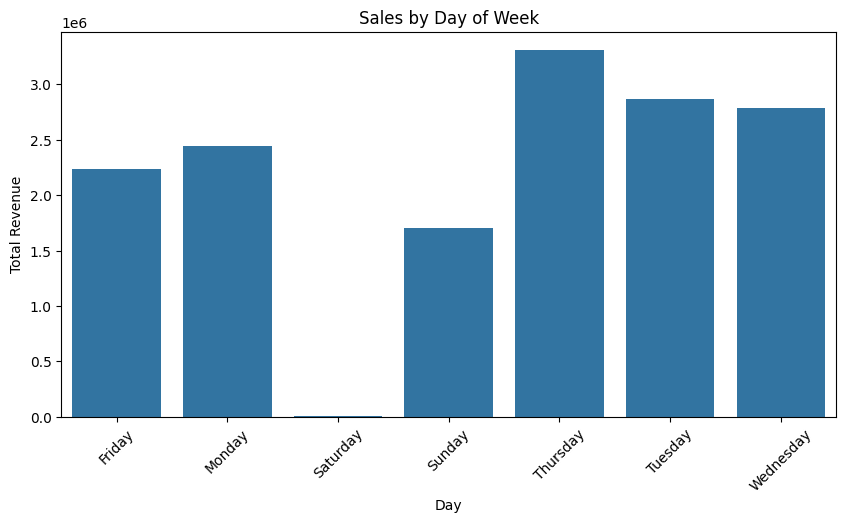

In [77]:
# Calculate total revenue per day of week
day_sales = df.groupby('DayOfWeek')['totalprice'].sum()

# Visualization
plt.figure(figsize=(10,5))
sns.barplot(x=day_sales.index, y=day_sales.values)
plt.title("Sales by Day of Week")
plt.xlabel("Day")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 

This bar chart represents the total revenue generated on each day of the week to understand weekly purchasing patterns. The x-axis displays the days (Monday to Sunday), while the y-axis shows the total revenue collected on those days. This visualization is used to reveal how sales fluctuate across the week and to identify which days experience higher or lower customer engagement. Understanding this pattern helps businesses optimize operational planning, promotions, and weekly resource allocation.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 

In the code, we first group the dataset by DayOfWeek and calculate the total revenue for each day using the .sum() function. This results in a summary series (day_sales) containing one value per day. We then use Seaborn’s barplot() to convert these aggregated values into a clear bar chart. The figure size is set for better visibility, and labels are added for both axes. Finally, the day names are rotated to prevent overlapping and maintain readability.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • Weekday sales are significantly higher than weekend sales, especially from Tuesday to Thursday, indicating strong midweek customer activity.

 • Saturday consistently shows the lowest revenue, suggesting minimal customer engagement during weekends.

 • Monday and Friday have moderate sales, indicating a gradual rise after the weekend and slight dip before the weekend.

 • The pattern suggests customers prefer purchasing during routine business days rather than weekends.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>
 • These patterns can be used to forecast weekly seasonality, improving revenue prediction models.

 • Businesses can allocate staff more effectively, focusing manpower on high-demand weekdays.

 • Weekday-focused promotional campaigns would yield better engagement and revenue impact.

 • Weekend strategies (discounts or special offers) may help uplift low-performing days if needed.

 • Inventory replenishment can be optimized to avoid stockouts during high-traffic weekdays.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>
The sales-by-day analysis clearly highlights strong weekday performance and weaker weekend activity, indicating a structured weekly sales rhythm. This understanding helps businesses plan more efficiently, aligning marketing, inventory, and staffing decisions with predictable demand cycles. Overall, this visualization provides a solid foundation for weekly operational planning and revenue forecasting.

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
2 • SALES BY MONTH
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will be using a bar plot to show how the total revenue generated in each month.
</h4>


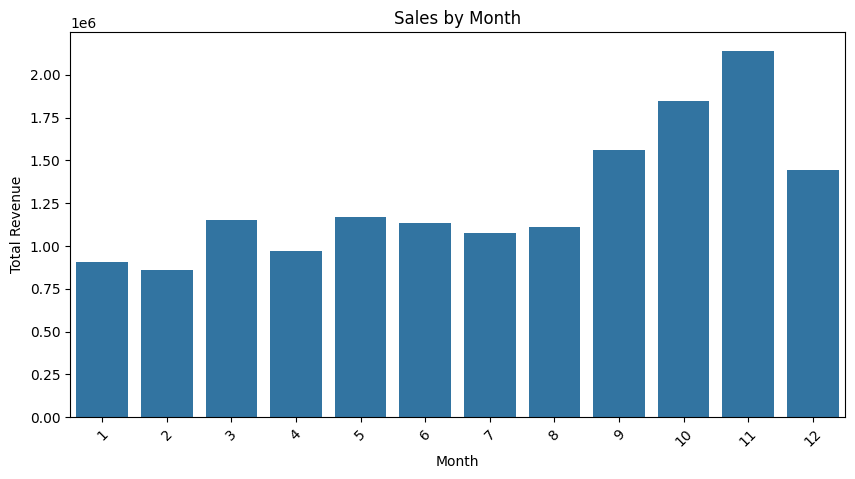

In [78]:

# Calculating monthly sales
monthly_sales = df.groupby('Month')['totalprice'].sum()

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 

This bar chart displays the total revenue generated in each month of the year, helping us understand long-term seasonal trends. The x-axis represents the months (1–12) and the y-axis shows the total revenue collected in each month. This visualization highlights how purchasing behavior changes across the year and identifies months with peak or slow sales. Such insights are essential for seasonal demand forecasting and yearly business planning.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 

We begin by grouping the dataset by the Month column and computing the total revenue per month using the .sum() function. This produces a summarized monthly revenue series (monthly_sales). We then use Seaborn’s barplot() to visually compare revenue across all 12 months. Custom labels and axis formatting enhance readability, while rotating the month labels prevents overlap and ensures clarity.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • November shows the highest revenue, driven by pre-Christmas shopping and seasonal demand.

 • October and December also perform strongly, reflecting year-end gifting and holiday purchases.

 • Early months like January, February, and March have lower sales, indicating a slow post-holiday period.

 • Mid-year months (May–August) show moderate but stable sales, suggesting consistent customer behavior.

 • The overall pattern reveals a strong Q4 performance, typical of retail and gift-related businesses.s.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>
 • Seasonal spikes can enhance yearly revenue forecasting and help predict demand surges.

 • Businesses can increase inventory in Q4 to prepare for peak months and avoid stockouts.

 • Marketing budgets can be shifted to capitalize on high-demand months like November.

 • Understanding low-performing months provides opportunities for off-season promotions.

 • Helps plan staffing, warehouse management, and supply chain scheduling based on demand cycles.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>

The monthly sales analysis clearly shows strong seasonal patterns, especially toward the year’s end, highlighting the importance of Q4 for revenue generation. These findings enable better annual planning, targeted marketing efforts, and improved inventory management. Overall, this visualization plays a crucial role in understanding the business's long-term sales rhythm.

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
3 • SALES BY HOUR OF THE DAY
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will be using a bar chart that shows total revenue varies across each hour of the day
</h4>


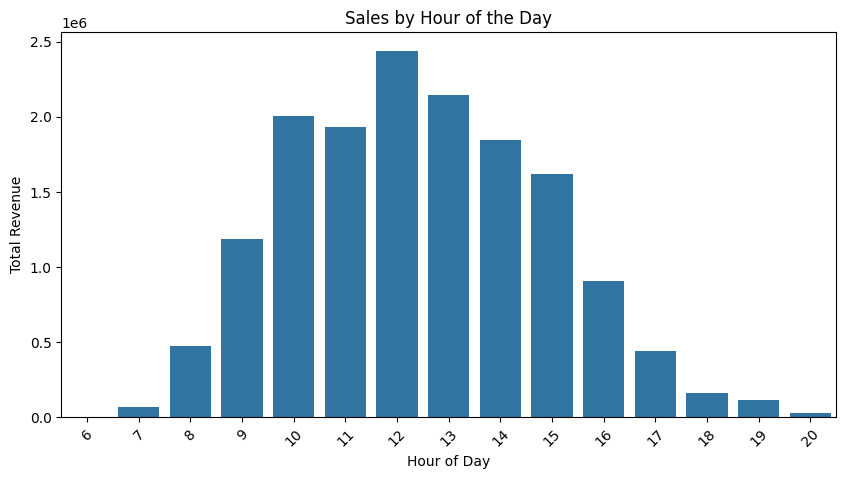

In [79]:
# Calculating hourly sales
hour_sales = df.groupby('Hour')['totalprice'].sum()

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(x=hour_sales.index, y=hour_sales.values)
plt.title("Sales by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 

This bar chart shows how total revenue varies across each hour of the day, helping us understand when customers make the most purchases. The x-axis displays hours (6 to 20), representing the time window in which transactions occurred, and the y-axis shows the total revenue generated during each hour. This visualization highlights peak business hours, revealing customer shopping habits and indicating when online activity is highest..

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 

We first group our dataset by the Hour column and compute the total revenue belonging to each hour using .sum(). This produces the hourly sales summary (hour_sales). Using Seaborn’s barplot(), we plot hours on the x-axis and their corresponding revenue on the y-axis. Labeling the axes and rotating the hour marks ensures clarity and helps easily interpret the hourly variation in sales activity.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • Highest sales occur between 10 AM and 2 PM, indicating this is the most active shopping window.

 • Revenue begins to rise sharply around 8–9 AM, showing the start of customer activity.

 • After 3 PM, revenue gradually declines, suggesting reduced purchasing in late afternoon.

 • Very early hours (6–7 AM) and late hours (7 PM onward) show minimal sales, confirming low customer engagement.

 • The overall pattern indicates customers prefer shopping during midday peak hours when they are most active online.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>
 • Helps identify optimal times to run promotions and targeted advertising when customer engagement is highest.

 • Useful for scheduling operational tasks (e.g., system updates during low-traffic hours).

 • Supports demand forecasting for time-based inventory planning.

 • Provides insights for optimizing website performance, preparing for peak-hour traffic loads.

Can help in planning staff allocation or automated support systems during busy hours.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>
The analysis of hourly sales reveals a clear midday peak, indicating that customers tend to shop most frequently between late morning and early afternoon. This pattern is valuable for optimizing marketing timing, planning operational activities, and improving customer experience during high-traffic hours. Understanding these time-based trends ensures more strategic decision-making and efficient resource allocation.

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
4 • SALES BY WEEK OF THE YEAR
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will be using a ine chart to show the change in sale by each week . as we know we had already done a sales by month which will shows the salw perfomance . abd by using the week wise analysis it will help us to understand when an change occured inside a month.
</h4>

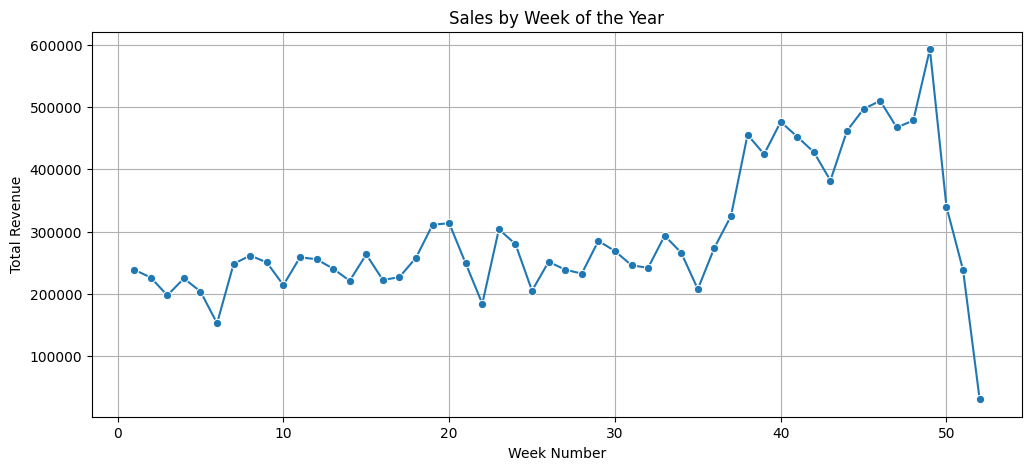

In [87]:
# Calculating weekly sales
weekly_sales = df.groupby('Week')['totalprice'].sum()

# Plotting
plt.figure(figsize=(12,5))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, marker='o')
plt.title("Sales by Week of the Year")
plt.xlabel("Week Number")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 

This line chart shows total revenue for each week of the year, helping us understand short-term seasonality and week-to-week sales fluctuations. The x-axis represents week numbers (1 to 52), while the y-axis shows total revenue generated in each week. This visualization is crucial for identifying weekly sales patterns, seasonal peaks, post-holiday slumps, and any unusual spikes that may indicate promotions or high-demand events.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 

We begin by grouping the dataset using the Week column and summing the total revenue for each week, creating the weekly_sales series. Then, Seaborn’s lineplot() is used to visualize these weekly totals, with marker='o' highlighting each data point on the line. Grid lines are added to make trend changes more visible, and axis labels clearly define the week numbers and revenue values.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • Early weeks (1–10) show lower and stable revenue, reflecting a slow start after the holiday season.

 • Revenue begins rising steadily from week 20 onward, indicating mid-year shopping momentum.

 • The most significant growth happens during weeks 35–48, marking the strongest business period of the year.

 • Weeks 45–48 display a sharp revenue spike, strongly aligning with pre-Christmas and year-end shopping.

 • Revenue drops sharply after week 50, reflecting post-holiday slowdown and limited operational days.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>
 • Helps forecast seasonal demand, especially for mid-year and Q4 peaks.

 • Supports inventory planning, ensuring stock availability during high-demand weeks.

 • Enables businesses to plan promotions and marketing campaigns around the strongest weeks.

 • Useful for weekly revenue forecasting models, identifying patterns of growth and decline.

 • Offers insights for adjusting staffing, logistics, and supply chain activities during peak weeks.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>
The weekly sales trend reveals clear seasonal behavior, with significant peaks in the second half of the year, especially during the festive season. These weekly insights help businesses anticipate demand cycles, plan strategically for peak weeks, and optimize their operations throughout the year.

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
5 • TOP 10 REVENUE GENERATING PRODUCTS
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will be using a bar chart to show the top 10 products which have highest revenue generation . 
</h4>

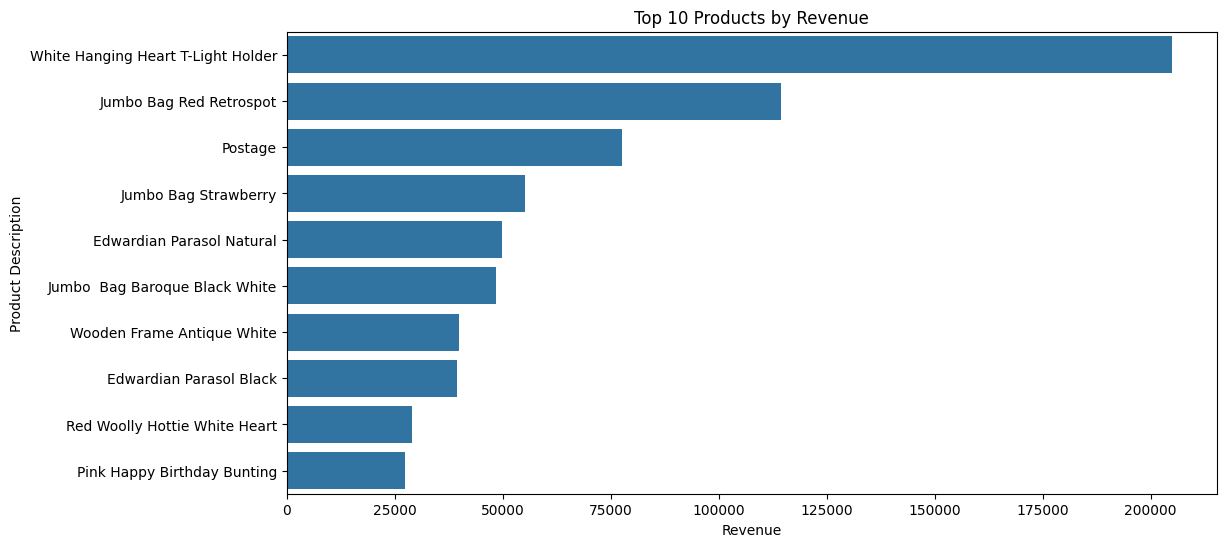

In [81]:
# Calculating top 10 revenue-generating products
top10_products = (
    df.groupby(['StockCode', 'Description'])['totalprice']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(y=top10_products['Description'], x=top10_products['totalprice'])
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Description")
plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 

This bar chart highlights the top 10 products that generated the highest total revenue. The y-axis lists the product descriptions, making the chart easy to interpret, while the x-axis displays the total revenue earned by each product. This visualization helps identify which products are the biggest contributors to overall sales and reveals customer preference patterns. It is essential for understanding product-level performance and guiding decisions related to inventory, marketing, and pricing strategies.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 

We begin by grouping the dataset using both StockCode and Description to ensure each product is uniquely identified. We then calculate the total revenue generated by each product and sort the results in descending order to extract the top 10 revenue leaders. After resetting the index for easier plotting, we use a horizontal bar chart with Seaborn’s barplot() to display product descriptions clearly and make revenue comparisons straightforward.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • Products such as White Hanging Heart T-Light Holder and Jumbo Bag Red Retrospot generate the highest revenue, indicating strong and consistent demand.

 • Many top products belong to categories like decor items, gift items, and reusable bags, showing customer preference for everyday lifestyle and gifting products.

 • Several variants of the same item type (e.g., Jumbo Bags) appear in the top list, suggesting strong product family performance.

 • The presence of Postage indicates frequent small transactions where shipping or packaging charges contribute significantly to revenue.

 • Overall, revenue is highly concentrated among a small set of best-sellers.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>
 • Helps identify core inventory items that must always remain in stock to avoid revenue loss.

 • Supports demand forecasting for high-performing products, ensuring adequate supply during peak periods.

 • Assists in pricing optimization, since top products might tolerate slight price adjustments without affecting demand.

 • Useful for designing targeted marketing campaigns, promotions, and recommendation systems.

 • Reveals which product categories could be expanded or replicated based on customer demand patterns.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>
The top-performing products clearly dominate revenue generation and reveal strong customer preferences for specific gift and home décor items. These insights help businesses prioritize product availability, optimize stock levels, and design more effective pricing and marketing strategies focused on their highest-value items.

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
6 • CUSTOMER MONETARY VALUE DISTRIBUTION
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will  be using the histogram to calculat how thw monwtary vale is distributed across all customers
</h4>

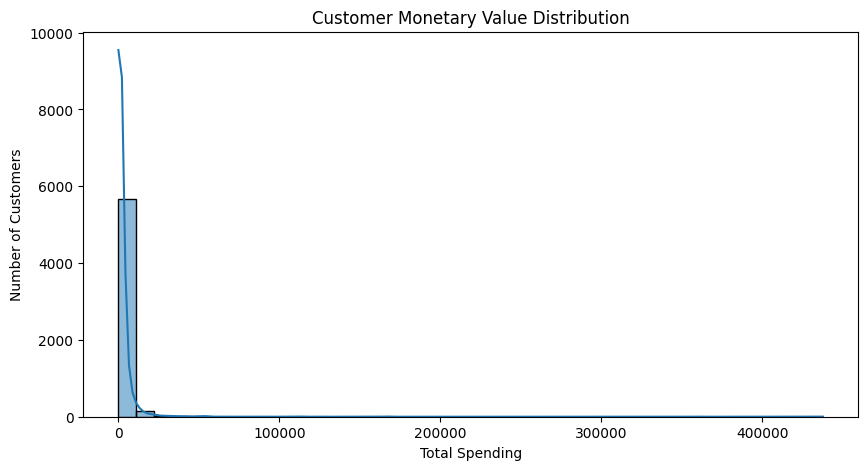

In [82]:

plt.figure(figsize=(10,5))
sns.histplot(customer_summary['Monetary'], bins=40, kde=True)
plt.title("Customer Monetary Value Distribution")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 
This histogram illustrates how total spending (Monetary Value) is distributed across all customers. The x-axis displays the total amount each customer spent, while the y-axis shows the number of customers falling within each spending range. A histogram is ideal here because monetary values are continuous and often skewed, allowing us to easily identify low-, medium-, and high-value customer groups. This visualization is essential for understanding spending behavior and detecting concentration of revenue.


<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 

We use sns.histplot() to plot the distribution of the Monetary column from the customer_summary DataFrame. The bins=40 parameter increases the detail level by dividing the spending range into multiple intervals. The kde=True option adds a smooth density curve on top of the histogram, making the distribution pattern easier to interpret. Axis labels and titles are provided to maintain clarity and readability.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • The distribution is highly right-skewed, meaning most customers spend only a small amount while a few customers spend significantly more.

 • A large cluster of customers falls in the low-spending range, confirming the dominance of casual or occasional buyers.

 • The long right tail indicates the presence of high-value customers, who contribute disproportionately to revenue.

 • The spending gap between average customers and top spenders is quite large, reflecting uneven contribution to total sales.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>

 • Helps identify potential VIP customers for personalized marketing and loyalty rewards.

 • Useful for designing RFM (Recency–Frequency–Monetary) segmentation for targeted campaigns.

 • Supports revenue forecasting by showing how much revenue depends on high-value customer behavior.

 • Assists in detecting spending thresholds, helping plan promotional strategies tailored for different customer groups.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>
The customer monetary distribution clearly shows that while most customers spend modestly, a smaller group contributes significantly to total revenue. Understanding this disparity allows businesses to focus on retaining high-value customers and improving engagement with medium spenders to boost overall profitability.

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
7 • CUSTOMER PURCHASE FREQUENCY DISTRIBUTION
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will  be using the histogram to understand how frequently the customers had participated on sales and the top 10 customers who have most purchasing record
</h4>

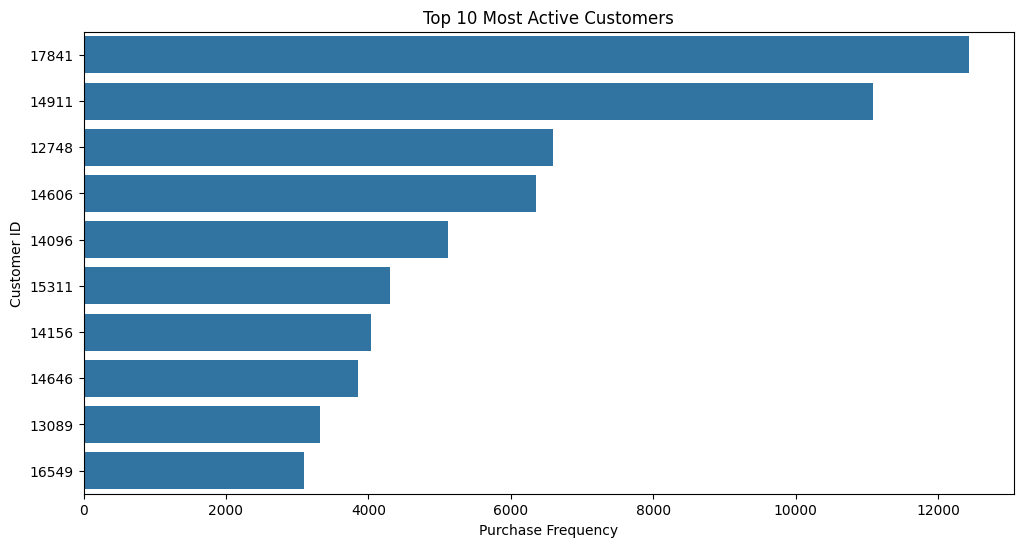

In [83]:
# Top 10 most active customers
top_customers = customer_summary.sort_values('Frequency', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y=top_customers.index, x=top_customers['Frequency'], orient='h')
plt.title("Top 10 Most Active Customers")
plt.xlabel("Purchase Frequency")
plt.ylabel("Customer ID")
plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 
This visualization shows the Top 10 customers with the highest purchase frequency. The y-axis lists the Customer IDs, and the x-axis shows how many times each customer made a purchase. A horizontal bar chart is used because customer IDs are long and numeric; displaying them vertically would make the graph cluttered. This chart helps identify the most active, loyal, and repeat customers who significantly contribute to overall transaction volume.


<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 

We start by sorting customer_summary based on the Frequency column in descending order to identify the top 10 most active customers, storing the result in top_customers. We then use a horizontal bar chart (orient='h') to display frequency values along the x-axis and customer IDs along the y-axis, which makes the chart cleaner and easier to interpret. The figure size improves visibility, and appropriate labels and title help explain what the visualization represents.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • The chart highlights a small group of customers who consistently place more orders than others, showing strong engagement and loyalty.

 • These top customers contribute disproportionately to transaction counts, often forming the core repeat-purchase segment.

 • High-frequency customers tend to be more familiar with the brand or depend on the store for regular purchases.

 • The presence of sharply higher bars indicates that customer activity is not evenly distributed, but concentrated among a few.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>

 • Helps businesses identify loyal customers who should be targeted with loyalty programs, special offers, or early-access deals.

 • Supports customer retention strategies, focusing on maintaining relationships with high-frequency buyers.

 • Useful for forecasting repeat-purchase patterns and estimating the contribution of recurring customers to future sales.

 • Can help design behavior-based segmentation models for personalized marketing.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>
The horizontal bar chart reveals that a small set of customers makes significantly more purchases than the average shopper, indicating a high-value repeat segment. Identifying and nurturing these customers is essential for sustaining long-term revenue and improving customer lifetime value.


<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
8 • INVOICE AMOUNT DISTRIBUTION
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will  be using the histogram to understand how invoice totals are scttered across .
</h4>

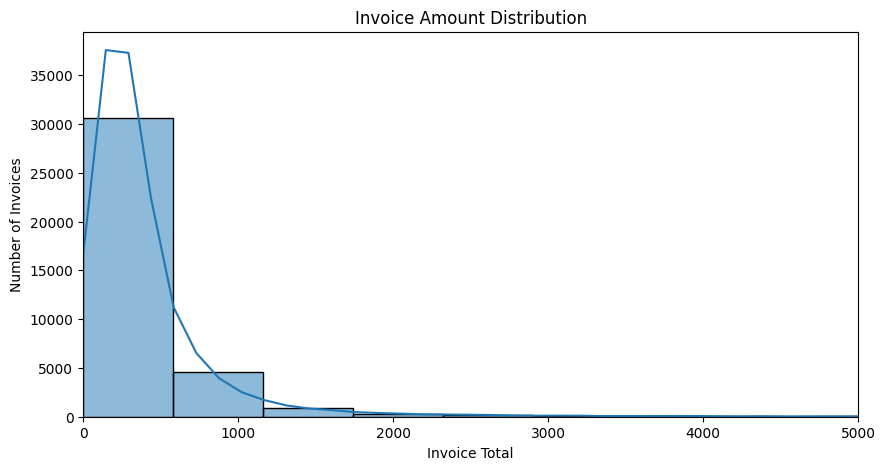

In [97]:

plt.figure(figsize=(10,5))
sns.histplot(invoice_totals, bins=50, kde=True)

plt.title("Invoice Amount Distribution")
plt.xlabel("Invoice Total")
plt.ylabel("Number of Invoices")

# LIMIT X-AXIS RANGE FOR BETTER VISUAL CLARITY
plt.xlim(0, 5000)

plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 
This histogram illustrates how invoice totals (the total amount spent per transaction) are distributed across all orders. The x-axis represents the invoice total amount, while the y-axis shows the number of invoices within each spending range. A histogram is the most suitable chart type here because invoice amounts are continuous values and often vary widely. This visualization helps detect common order sizes, spending behavior per transaction, and the presence of unusually large purchases.


<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 

We use sns.histplot() to visualize the distribution of all invoice totals stored in invoice_totals. Setting bins=50 provides a detailed view of how invoice values are spread across different ranges. The kde=True parameter overlays a smooth curve to highlight the density and shape of the distribution. Proper labels and figure size ensure clarity and readability, making it easier to interpret spending patterns per transaction.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • The distribution is highly right-skewed, indicating that most invoices are low to medium in value.

 • A small number of invoices have significantly higher totals, creating a long tail on the right side.

 • This pattern suggests that while many customers place small orders, a few large transactions greatly influence total revenue.

 • The presence of scattered high-value invoices indicates bulk purchases or special, high-volume orders.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>

 • Helps identify normal invoice ranges and detect outliers or unusually large transactions.

 • Useful for planning price optimization strategies, understanding typical order sizes.

 • Assists in designing cross-selling and up-selling strategies by identifying the most common invoice ranges.

 • Supports forecasting models by showing how invoice values contribute to overall revenue distribution.

 • Enables better inventory and packaging planning by understanding the usual order size.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>
The invoice distribution shows that most transactions are relatively small, while a limited number of large invoices significantly boost total revenue. Understanding these order patterns helps with pricing strategy, operational planning, and predicting future transaction behavior. This visualization provides a clear overview of how customers typically spend per order.


<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
9 • CONSUMER SEGMENTATION
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will  be using the pie chart for the understanding the level of segmentation among cutomers according to their purchases.
</h4>

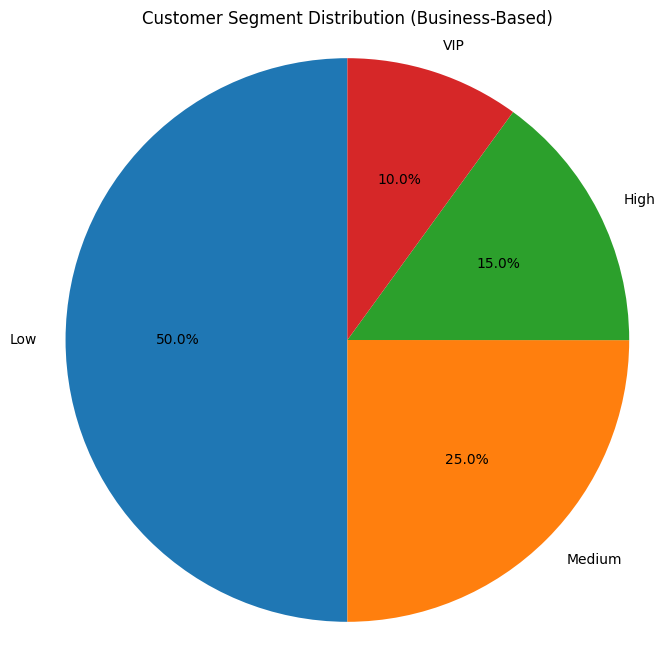

In [92]:

segment_counts = customer_summary['Segment'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(segment_counts, labels=segment_counts.index,
        autopct='%1.1f%%', startangle=90)
plt.title("Customer Segment Distribution (Business-Based)")
plt.axis('equal')
plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 
In this visualization, customer monetary value is mapped into four business-based segments. The x-axis categories represent the customer groups (Low, Medium, High, VIP), and the y-axis values represent the proportion of customers belonging to each segment. The pie chart helps us understand the distribution of spending behavior.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 
We first calculated realistic threshold values using quantiles instead of equal-sized quartiles. Then, each customer was assigned a segment based on where their spending falls relative to these thresholds. Finally, we counted the customers in each segment and used a pie chart to visualize the distribution..
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • Most customers fall under the "Low" segment, indicating that a large portion of the customer base consists of occasional or budget-conscious buyers.

 • Medium spenders form a moderate portion, representing regular customers who contribute consistent revenue.

 • High-spending customers are fewer but more valuable, possibly driving a substantial part of revenue.

 • VIP customers, though very few, contribute disproportionately to total revenue, making them the most critical group for retention

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>

 • Businesses should focus retention strategies on High & VIP segments, as losing them impacts revenue heavily.

 • Medium segment customers can be targeted with promotions to convert them into High spenders.

 • Low segment customers may benefit from discount-driven campaigns or bundle offers to increase their spending.

 • Future models can forecast VIP churn risk, lifetime value, and segmentation movement across months

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>
This segmentation visualization reveals the real-world spending behavior of customers. Unlike artificial equal-sized groups, these business-defined segments highlight the actual distribution of low-, mid-, and high-value customers. This information supports targeted marketing, loyalty strategies, and revenue forecasting, making it a vital component of your project.

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
10 • PRODUCT REVENUE ACROSS WEEK (HEAT MAP)
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will  be using a heat map to understand the hoe product revenue varies across a year
</h4>

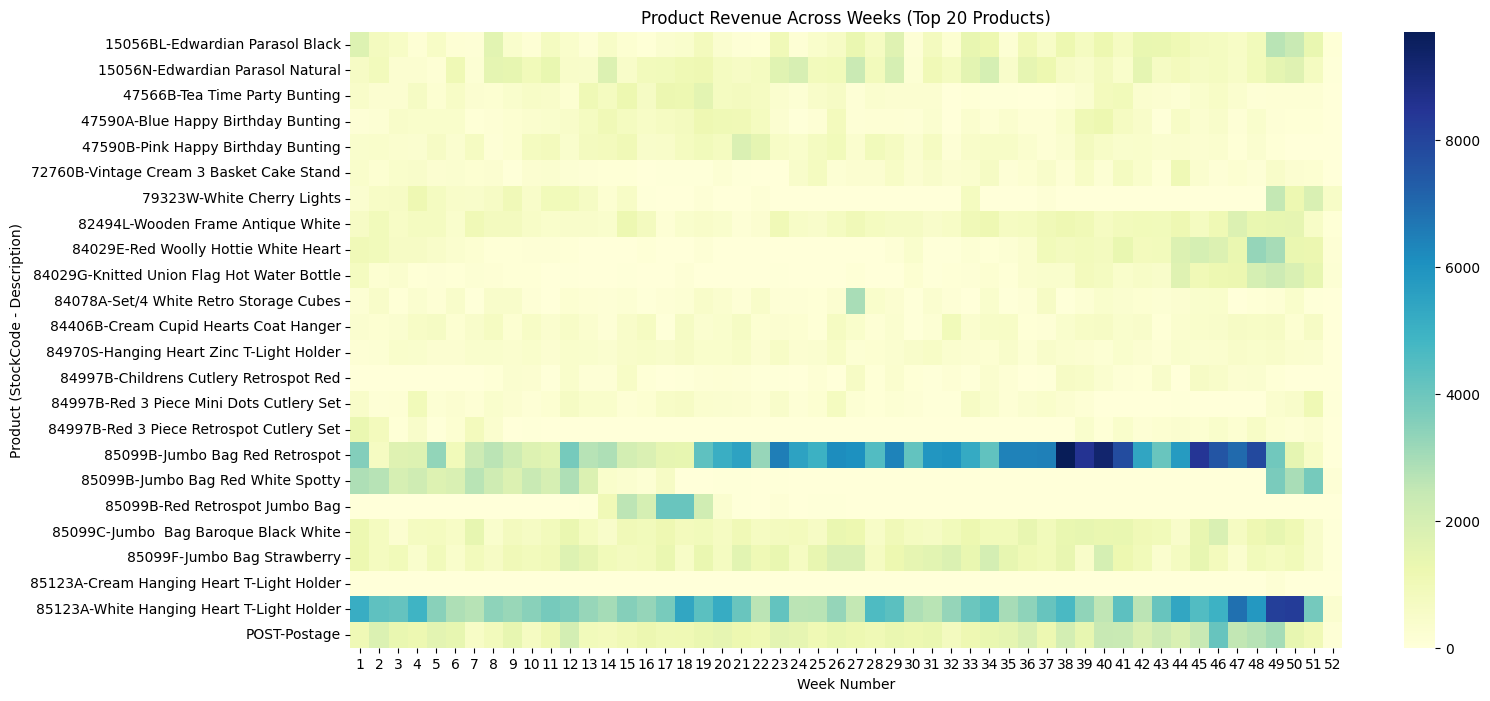

In [93]:
# Selecting top 20 revenue-generating products for a cleaner heatmap
top_products = (df.groupby(['StockCode', 'Description'])['totalprice']
                  .sum()
                  .sort_values(ascending=False)
                  .head(20)
                  .reset_index())

# Filtering dataset for only these top products
filtered_df = df.merge(top_products[['StockCode']], on='StockCode')

# Creating the pivot table
product_week_pivot = filtered_df.pivot_table(
    values='totalprice',
    index=['StockCode', 'Description'],
    columns='Week',
    aggfunc='sum',
    fill_value=0
)

# Plotting the heatmap
plt.figure(figsize=(16,8))
sns.heatmap(product_week_pivot, cmap="YlGnBu")
plt.title("Product Revenue Across Weeks (Top 20 Products)")
plt.xlabel("Week Number")
plt.ylabel("Product (StockCode - Description)")
plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 
This heatmap visualizes how product revenue varies across all weeks of the year, allowing us to observe which products perform consistently and which ones are seasonal. The y-axis lists the top-selling products (StockCodes with Descriptions), and the x-axis represents week numbers (1–52). The intensity of color indicates the total revenue for each product in each week, helping us quickly identify periods of high demand, product seasonality, and week-level sales spikes. This visualization is ideal for identifying fast-moving items during specific weeks and detecting how product performance changes throughout the year.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 
We first identify the top 20 highest revenue-generating products to keep the heatmap readable and meaningful. The dataset is then filtered to include transactions only from these top products. Using pivot_table(), we convert the data into a matrix with products as rows and weeks as columns, filled with total revenue values. The heatmap is plotted using Seaborn’s heatmap(), where darker colors represent higher revenue. This visual format makes seasonal or weekly product fluctuations quickly visible.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • Certain products show consistent revenue throughout the year, indicating stable demand (core products).

 • Many products display sharp revenue spikes during specific weeks, especially near weeks 45–50, aligning with holiday shopping periods.

 • Some products show very low activity for most weeks, revealing niche or seasonal items.

 • Products like decorative items and bags appear prominently with high demand during festive weeks.

 • Weekly revenue patterns differ widely across products, showing that each product follows its own seasonal curve.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>

 • Helps forecast product-specific demand during high and low weeks.

 • Supports inventory planning by indicating which products need more stock before seasonal peaks.

 • Helps identify new promotional opportunities for slow-moving products during off-season weeks.

 • Useful for understanding which products should be highlighted during major seasonal campaigns.

 • Assists in building product clustering models based on seasonal sales behavior.

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>
This segmentation visualization reveals the real-world spending behavior of customers. Unlike artificial equal-sized groups, these business-defined segments highlight the actual distribution of low-, mid-, and high-value customers. This information supports targeted marketing, loyalty strategies, and revenue forecasting, making it a vital component of your project.

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
11 • TOP 10 MOST ACTIVE CUSTOMERS
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will  be using a horizontal barchart to trace the most active cutomers.
</h4>

C:\Users\Sariya\AppData\Local\Temp\ipykernel_13984\3975408496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


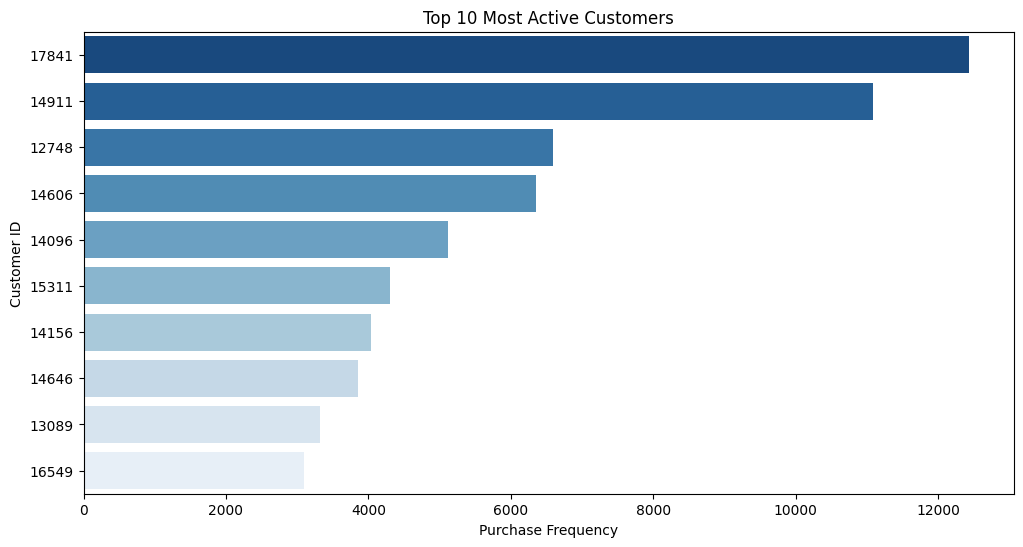

In [95]:

# Selecting the top 10 most active customers
top_customers = customer_summary.sort_values('Frequency', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(
    y=top_customers.index, 
    x=top_customers['Frequency'], 
    orient='h', 
    palette="Blues_r"
)
plt.title("Top 10 Most Active Customers")
plt.xlabel("Purchase Frequency")
plt.ylabel("Customer ID")
plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 
This visualization highlights the top 10 customers who made the highest number of purchases. The y-axis lists the Customer IDs, while the x-axis shows their total purchase frequency. A horizontal bar chart is ideal here because it cleanly displays long numeric customer IDs without overlapping. This chart helps identify the most engaged and loyal customers who repeatedly contribute to the business through frequent purchases.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 
We sort customer_summary by the Frequency column in descending order to extract the top 10 most active customers. These values are stored in top_customers. We use Seaborn’s barplot() with orient='h' to draw a horizontal bar chart where customer IDs appear clearly on the y-axis. The Blues_r palette adds a gradient effect that visually emphasizes higher purchase frequencies.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • A small group of customers makes purchases far more frequently than the average shopper, demonstrating high engagement.

 • These customers are likely familiar with the store and may rely on it for regular needs or repeat gift purchases.

 • There is a noticeable gap between the top few customers and the rest, indicating uneven engagement distribution.

 • These top 10 customers represent a valuable segment that drives continuous transaction volume.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>

 • Helps identify potential VIP customers for special loyalty programs and retention strategies.

 • Helps forecast repeat purchasing behavior, essential for customer lifetime value analysis.

 • Supports targeted marketing efforts (e.g., early access, personalized offers, bundling recommendations).

 • Can be used to detect new opportunities for cross-selling and upselling.

 • Helps understand customer loyalty trends and potential churn risk among frequent buyers..

<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>
This visualization reveals that a small number of customers consistently drive a high volume of transactions. Understanding their behavior is crucial for strengthening loyalty programs, improving retention strategies, and forecasting repeat-purchase trends.

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
12 • WEEK x HOUR REVENUE HEAT MAP
</h3> 

<h4 style="color:teal; font-family:'Times New Roman';">
Here we will  be using a heat map to undertand level of revenue generated at specific time at a specific week
</h4>

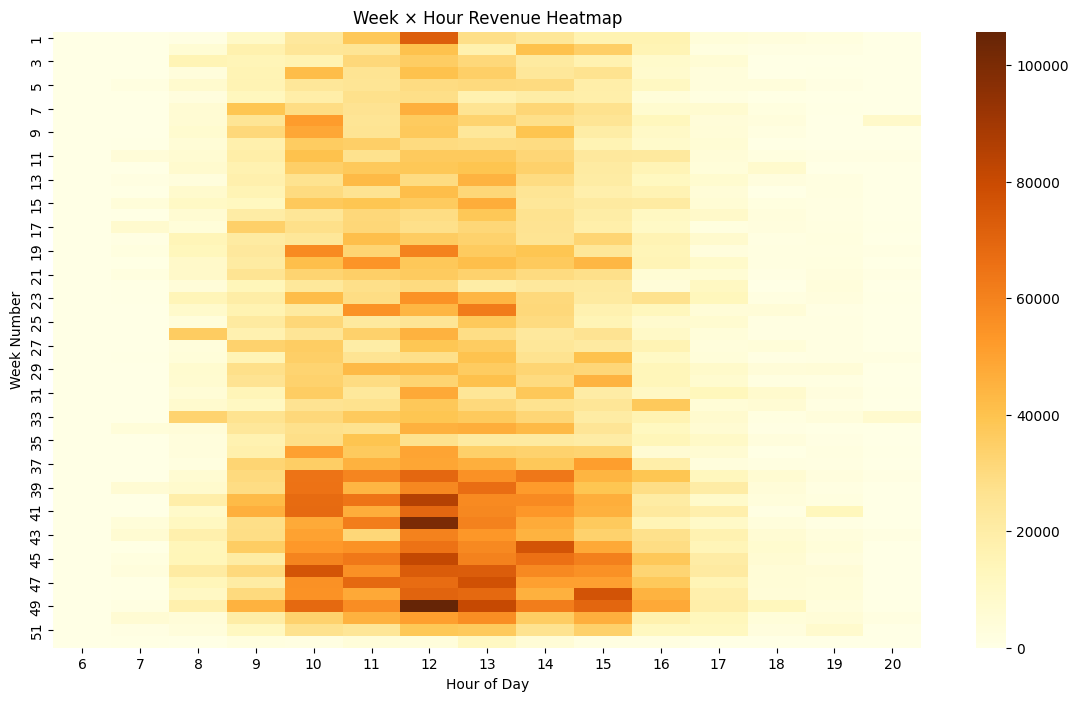

In [96]:
# Creating the pivot table for Week × Hour
week_hour_pivot = df.pivot_table(
    values='totalprice',
    index='Week',
    columns='Hour',
    aggfunc='sum',
    fill_value=0
)

# Plotting the heatmap
plt.figure(figsize=(14,8))
sns.heatmap(week_hour_pivot, cmap='YlOrBr')
plt.title("Week × Hour Revenue Heatmap")
plt.xlabel("Hour of Day")
plt.ylabel("Week Number")
plt.show()

<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
INTERPRETATION.
</h4> 
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Chart Description
</h5> 
This heatmap visualizes the combined effect of week number (1–52) and hour of the day (6–20) on total revenue. The x-axis represents hours, while the y-axis represents week numbers. Each cell's color intensity indicates the total revenue generated at that specific hour during that week.
This multivariate visualization helps uncover deeper temporal behavior — not just which weeks are strong or which hours are strong, but exactly when certain hours become peak revenue windows across the year. It is extremely useful for high-quality operational and marketing strategy.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Code Breakdown
</h5> 
We first construct a pivot table where weeks are rows and hours are columns, with each cell showing the total revenue for that specific hour–week combination. The parameter fill_value=0 ensures empty combinations are counted as zero instead of showing NaN. Using Seaborn’s heatmap(), the pivot table is converted into a color-coded visualization using the “YlOrBr” palette. Darker (more orange/brown) cells indicate higher revenue, allowing quick identification of peak periods.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Insights 
</h5>
 • The heatmap shows clear hour-level patterns: revenue consistently peaks between 10 AM and 2 PM across most weeks.

Weeks 45–50 show strong dark patches, confirming pre-Christmas and holiday season activity, with heavy midday traffic.

Early weeks (1–10) show low activity across all hours, reflecting a post-holiday slowdown.

Mid-year weeks show stable but moderate activity, suggesting consistent daytime shopping behavior.

Very early hours (6–8 AM) and late hours (17–20) show minimal revenue in most weeks, confirming predictable daily sales cycles.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Suggestions (Predictive Interpretaions)
</h5>

 • 
Helps forecast both daily and weekly demand, improving the accuracy of seasonal + hourly prediction models.

Allows businesses to plan peak-hour staffing specifically during high-revenue weeks.

Supports server load or website optimization, ensuring stable performance during known high-traffic windows.

Identifies the best timing for promotional emails or flash sales, especially during seasonal peak weeks.

Helpful for inventory movement planning, especially during hours when demand rises sharply in busy weeks.
<h5 style="color:orange; font-family:'Times New Roman'; font-weight:bold;">
 • Conclution
</h5>

The Week × Hour heatmap combines two critical time dimensions to reveal precise patterns of customer purchasing behavior. It identifies peak traffic hours within peak revenue weeks, offering powerful guidance for operational planning, marketing timing, and overall demand forecasting. This visualization adds strong analytical depth to the project, completing the time-based analysis.

<h2 style="color:gray; font-family:'Times New Roman'; font-weight:bold;">
FINAL REPORT
</h2>

In this section, we summarize the key insights derived from the entire analysis — including data cleaning, feature engineering, exploratory data analysis, and visualizations. The goal is to bring all findings together into a clear, meaningful interpretation of customer behavior, seasonal trends, and sales performance.

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
Key Insights From the Analysis
</h3> 

<h4 style="color:TEAL; font-family:'Times New Roman'; font-weight:bold;">
i . Customer Behavior Insights
</h4 > 

 • Customer purchase frequency is highly uneven, with a large number of one-time or low-frequency buyers and only a small portion of repeat or high-spending customers.

 • Monetary value distribution is skewed, indicating that a small group of customers contributes a disproportionately large share of revenue.

 • RFM segmentation showed distinct customer groups (Low, Medium, High, VIP), enabling targeted marketing strategies.

 <h4 style="color:TEAL; font-family:'Times New Roman'; font-weight:bold;">
ii. Time-based Sales Patterns
</h4 > 

 • Day-of-week analysis showed strong weekday performance, with Tuesday–Thursday generating the highest revenue.

 • Hourly analysis revealed peak sales between 10 AM and 2 PM, suggesting strong mid-day customer activity.

 • Monthly and weekly trends highlighted strong seasonality, with notable peaks during November and December, likely driven by holidays and year-end demand.

<h4 style="color:TEAL; font-family:'Times New Roman'; font-weight:bold;">
iii. Product Performance Insights
</h4 > 

 • A small group of products consistently generates the majority of revenue, especially gift, décor, and packaging items.

 • Product-week heatmaps revealed patterns of seasonality for multiple products, helping identify items with stable demand and others with seasonal spikes.

 • Top-performing products show both high revenue and consistent weekly activity, making them essential for inventory planning.
 
<h4 style="color:TEAL; font-family:'Times New Roman'; font-weight:bold;">
iv. Invoice-level Insights
</h4 > 

 • Invoice amounts are heavily concentrated in the lower range (₹0–₹5000), with occasional high-value transactions.

 • There is only a moderate correlation between quantity purchased and invoice total, indicating that high-priced items contribute more to revenue than bulk purchases.

<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
Significant Correlations & Observations
</h3> 
 
 • Frequency ↔ Monetary correlation shows that customers who buy more often tend to spend more — useful for loyalty program planning.

 • Time-based patterns strongly align with retail business cycles (weekdays stronger, year-end peak).

 • Products with 52/52 active weeks represent the stable backbone of the inventory.
<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
Recommendations & Next Steps
</h3> 

 
<h4 style="color:purple; font-family:'Times New Roman'; font-weight:bold;">
i. Business Recommendations
</h4 >


 • Strengthen repeat-purchase strategies: loyalty points, targeted offers, membership programs.

 • Stock more of high-performing items especially during peak months to avoid stock-outs.

 • Focus marketing during peak hours and days, as customers are more active mid-day and mid-week.

 • Optimize promotions for seasonal sales—especially holiday months where demand sharply rises.

 • Increase visibility of high-value, low-frequency products to attract premium buyers.

<h4 style="color:TEAL; font-family:'Times New Roman'; font-weight:bold;">
ii. Future Analytical Extensions
</h4 > 


 • Customer lifetime value (CLV) prediction

 • Time-series forecasting for weekly and monthly sales

 • Product bundling recommendations using association rule mining

 • Advanced segmentation using clustering (k-means, DBSCAN)

 • Price optimization models based on elasticity
<h3 style="color:navy; font-family:'Times New Roman'; font-weight:bold;">
 Final Summary
</h3 >
This project provided a comprehensive understanding of customer behavior, product performance, and time-based sales patterns. Through systematic cleaning, feature engineering, visual analysis, and segmentation, we uncovered meaningful insights that can support strategic decisions in inventory management, targeted marketing, and revenue optimization. Together, these findings highlight clear opportunities to improve customer engagement, forecast demand more accurately, and strengthen the business through data-driven decision-making.



